## <b> Business Problem </b>

Oceanside Property Management is a property management company located in San Diego California. Their main business is managing rental properties. However, they have recently noticed that a lot of Airbnb hosts have been reaching out to them for guidance. These hosts are mostly uninterested in having OPM manage their rentals, however they wany some help in increasing their success as Airbnb hosts.

There have been so many Airbnb hosts reaching out that OPM has decided that this can be a good side-business for them. So they plan on officially adding airbnb consulting as a service that they also provide. In their initial research they found that the top questions that potential clients who wish to utlize this service are:
- "What can I do to get more 5 star ratings?"
- "Can you help me reach Superhost status? (or maintain Superhost status)


These questions are understandable because Airbnb puts a huge focus on getting 5 star overall ratings. They also highly publicize the benefits of getting (and maintaining) Superhost status.

Oceanside Property Management has decided that the main focus of their service will be helping clients get more 5 star reviews. Therefore they have tasked me with providing the following: 
- A model that will predict whether a specific rental unit should get a 5 Star Overall score based on other available information.
- An industry analysis of AirBnb in San Diego. Specifically looking for any insight that they can give to their clients that will give them a leg up on people who don't use their consulting service.

They also want me to answer the following questions:
- Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- The benefits of being a 5 Star overall host, vs not being one. (again, is it worth all the work to have 5 Star overall rating)
- What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)

And finally, they want to know where their consulting service can make the most impact, so they know which features to market and/or which hosts to market to.

## <b>Understanding AirBnb</b>

### Who uses AirBnb?

information from: https://listwithclever.com/research/airbnb-vs-hotels-study/#sources, accessed 6/21/22

- Initially, the idea of staying in a random person’s home was viewed as absurd and dangerous, but public perception of peer-to-peer (P2P) vacation rentals has shifted significantly in recent years.
- A 2016 Goldman Sachs study found that, “If people have stayed in peer-to-peer lodging in the last five years, the likelihood that they prefer traditional hotels is halved (79 percent vs. 40 percent).”
- Airbnb is becoming the preferred choice of vacationers — 60% of travelers who use both Airbnb and hotels prefer Airbnb over comparable hotels when going on vacation
- 68% of business travelers prefer staying in hotels when traveling for work, and they're more likely to have a negative experience at an Airbnb

information from: https://www.torontomu.ca/news-events/news/2016/10/why-tourists-choose-airbnb-over-hotels/ accessed 6/21/22

David Guttentag, professor at the Ted Rogers School of Hospitality and Tourism Management, identifies five types of Airbnb guests based on his 2016 study:

- Money savers: Choose Airbnb because of affordability
- Home seekers: Interested in household amenities and larger spaces
- Collaborative consumers: Motivated by the share economy philosophy and the ability to have an authentic experience
- Pragmatic novelty seekers: While not regular Airbnb users, these travelers are drawn to the novelty of Airbnb
- Interactive novelty seekers: Want to interact with their host or other locals


### AirBnb's Focus

### Importance of 5 Star Rating

AirBnb focuses on exceeding customer expectations, which is why they strictly require that hosts maintain a near perfect rating in order to remain on the service.

### Importance of Superhost
- information from https://www.airbnb.com/d/superhost. Accessed 6/16/22

<b>Advantages: </b>
- Superhost badge to stand out among other hosts.
- Customers can filter search results to show only superhosts.

<b>Requirements:</b>
- Minimum 4.8 overall rating.
- 10 stays over the last year.
- < 1% Cancellation Rate.
- At least 90% Response Rate.
- Reassessed every 3 months.

### Problems with Airbnb Data and/or Ratings System

The review data is incredibly skewed because Airbnb requires such a high rating. Even though there is a 5 point scale, Anything lower than a 4.8 is seen as failure.
- So while this is technically a 5pt scale (as a reviewer can give 1 - 5 stars, with no partial stars allowed), getting a 4.0 average could result in being de-listed from the service!

In order to stay at a 4.8 overall rating:
- a host will need to have <b>four</b> 5-star reviews to offset a single 4-star review.
- a host will need to have <b>ten</b> 5-star reviews to offset a single 3-star review.

A common problem with this review system is that airbnb guests often assume that airbnb's review scale functions similarly to a hotel review scale, which also uses 5 stars, with 3 considered average, 4 above average, and 5 star being the best possible experience.

## <b>My Process</b>

### Summary of My Process: 


### Goals for my Model:

<b><u>What I will be looking for in my models:</b></u>
- 1. <b>High Precision Score:</b> I want to make sure that I am identifying as many airbnb units that meet my target criteria as possible. I will keep this in balance by checking F1 Score.
- 2. <b>Good F1 Score:</b> While I am ultimately not concerned with Recall , a good F1 score means that the model is performing well on both Recall and Precision. Since Recall and Precision are inverses of each other, a good F1 score ensures that the model isn't skewed too far toward one or the other. (ie, a model that predicts EVERY customer is within my target would have perfect Recall, but would be useless).
- 3. <b>High Cross Validation Score:</b> This ensures that the model isn't overly trained on the test data and that it does a good job of predicted unseen and unknown data. (ie, the test set).
- 4. <b>Area Under the Curve (AUC):</b> The ROC AUC Score measures the Area under the ROC curve, which means that it classifies the true positive rate against the false positive rate. The higher the score, the better performing the model is. 

<b><u>That said, here is the scale that I will use to evaluate my models:</b></u>

- <b>.69 or less:</b> Model performs only slightly better than guessing and is worthless for my analysis.
- <b>.70 - .79:</b> Model still isn't performing very well, but is at minimum acceptable levels.
- <b>.80 - .89:</b> Model is performing fairly well. My goal is to be in this range or better.
- <b>.90 - .99:</b> Model is performing very well. I would be very happy to have a final model in this range.

## <b> Preprocessing </b>

### Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pylab import rcParams
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
import numpy as np


In [2]:
pd.set_option('display.max_rows', 1000)
plt.style.use('fivethirtyeight')

### Full_df: Dataframe Containing All Available Columns

In [3]:
full_df = pd.read_csv('listings.csv.gz')

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10935 non-null  int64  
 1   listing_url                                   10935 non-null  object 
 2   scrape_id                                     10935 non-null  int64  
 3   last_scraped                                  10935 non-null  object 
 4   name                                          10935 non-null  object 
 5   description                                   10809 non-null  object 
 6   neighborhood_overview                         7440 non-null   object 
 7   picture_url                                   10935 non-null  object 
 8   host_id                                       10935 non-null  int64  
 9   host_url                                      10935 non-null 

### Fixing Price
- Price is currently a string. I need to strip out the extra characters and convert the datatype to Float so that I can better utilize the data.

In [5]:
full_df['price'].head(2)

0     $60.00
1    $282.00
Name: price, dtype: object

In [6]:
full_df['price'] = full_df['price'].map(lambda x: x.replace('$',' '))
full_df['price'] = full_df['price'].map(lambda x: x.replace(',',''))
full_df['price'] = full_df['price'].astype(float)
full_df['price'].head(2)

0     60.0
1    282.0
Name: price, dtype: float64

In [7]:
#fulldf['price'].head(2)

## <b> Exploratory Data Analysis </b>

###  Base DF
- I am slicing out the columns that will be useful for analyzing and modeling the data, to make the dataframe more manageable.

In [8]:
base_df = full_df[['price', 'review_scores_rating', 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_value','accommodates', 'bedrooms', 'beds',
                      'instant_bookable', 'property_type', 'room_type', 'amenities', 'availability_365', 
                      'availability_30','availability_90','host_id', 'calculated_host_listings_count', 
                      'host_response_time', 'host_response_rate','host_is_superhost']]

In [9]:
df = base_df

### Host Info

In [10]:
df['host_response_time'].value_counts()

within an hour        7911
within a few hours    1327
within a day           590
a few days or more     285
Name: host_response_time, dtype: int64

The majority of hosts reply within an hour, so I will turn this into a binary classification

In [11]:
df['host_response_rate'].value_counts().head()

100%    7229
97%      354
98%      349
91%      279
99%      261
Name: host_response_rate, dtype: int64

Majority of hosts have 100% response rate, so I will turn this into a binary classification.

In [12]:
df['instant_bookable'].value_counts()

f    5912
t    5023
Name: instant_bookable, dtype: int64

In [13]:
df['host_id'].value_counts()

88168913     219
429429981    163
3017970      119
226804666     85
147276739     76
            ... 
113819301      1
205127323      1
14767766       1
5039760        1
20667939       1
Name: host_id, Length: 5034, dtype: int64

### New Feature: Host Listings
- Creating a new feature that tells whether a host has many listings.

In [14]:
df['calculated_host_listings_count'].describe()

count    10935.000000
mean        18.456607
std         39.761546
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max        219.000000
Name: calculated_host_listings_count, dtype: float64

- The majority of hosts in this dataset have between 1-13 listings. (25%-75%).
- The Median is 3.
- One has 219 listings.

In [15]:
df['host_listings_5-'] =df['calculated_host_listings_count'] <= 5
df['host_listings_5-'].sum()

6802

This is the target demographic for receiving this service. So I will make it a binary classification.
- I am setting it at 5 and under as it is slightly above the median.

### New Feature: Capacity Ranges

In [16]:
df['accommodates'].describe()

count    10935.000000
mean         4.818930
std          3.139456
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: accommodates, dtype: float64

In [17]:
df['capacity_5+'] = df['accommodates'] >=5

Analysis: Again, a binary classifier will be the most useful. Since a "family" unit would accomadate 4 or less, I am setting the classifier at 5 or more in order to determine whether the rental units are hotel room sized (2 or 4 people), or larger.

In [18]:
df['capacity_5+'].value_counts()

False    6386
True     4549
Name: capacity_5+, dtype: int64

This seems to be a good classifier as the split ends up being close to 50%.

### New Feature: Bedroom Ranges

In [19]:
df['bedrooms'].describe()

count    9905.000000
mean        1.969611
std         1.217462
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: bedrooms, dtype: float64

Most of the units in this dataset have 1-3 bedrooms. I will create a feature that groups units as either 1 bedroom or 2 or more.

In [20]:
df['bedrooms_2+'] = df['bedrooms'] >= 2

In [21]:
df['bedrooms_2+'].value_counts()

False    5651
True     5284
Name: bedrooms_2+, dtype: int64

### NEW FEATURE Availability Rate
- seeing the number of available days is good, but in some cases it may be more helpful to see this at a percentage.

In [22]:
df['availability_90'].value_counts().head(10)

0     1479
90     323
89     225
83     201
20     190
86     162
81     161
51     160
87     141
85     133
Name: availability_90, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           10935 non-null  float64
 1   review_scores_rating            9408 non-null   float64
 2   review_scores_accuracy          9385 non-null   float64
 3   review_scores_cleanliness       9385 non-null   float64
 4   review_scores_checkin           9383 non-null   float64
 5   review_scores_communication     9385 non-null   float64
 6   review_scores_location          9383 non-null   float64
 7   review_scores_value             9383 non-null   float64
 8   accommodates                    10935 non-null  int64  
 9   bedrooms                        9905 non-null   float64
 10  beds                            10813 non-null  float64
 11  instant_bookable                10935 non-null  object 
 12  property_type                   

In [24]:
df['availability_30_rate'] = df['availability_30'].apply(lambda x: x / 30)
df['availability_90_rate'] = df['availability_90'].apply(lambda x: x / 90)

In [25]:
df['booked_rate_30'] =  df['availability_30_rate'].apply(lambda x: 1 - x)
df['booked_rate_90'] =  df['availability_90_rate'].apply(lambda x: 1 - x)


In [26]:
df.head(2)

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,host_response_time,host_response_rate,host_is_superhost,host_listings_5-,capacity_5+,bedrooms_2+,availability_30_rate,availability_90_rate,booked_rate_30,booked_rate_90
0,60.0,5.00,5.00,5.00,5.00,5.00,4.00,5.00,2,1.0,...,within an hour,100%,f,True,False,False,0.0,0.566667,1.0,0.433333
1,282.0,4.87,4.91,4.64,4.99,4.98,4.87,4.86,6,3.0,...,within an hour,100%,t,True,True,True,0.4,0.700000,0.6,0.300000


In [27]:
availability_90 = df[['availability_90', 'availability_90_rate', 'booked_rate_90']]

In [28]:
availability_90.sort_values('booked_rate_90', ascending=False)

,availability_90,availability_90_rate,booked_rate_90
8584,0,0.0,1.0
1307,0,0.0,1.0
1323,0,0.0,1.0
9940,0,0.0,1.0
8158,0,0.0,1.0
...,...,...,...
6655,90,1.0,0.0
4473,90,1.0,0.0
1093,90,1.0,0.0
2223,90,1.0,0.0


In [29]:
availability = df[['availability_30_rate', 'booked_rate_30', 'availability_90_rate', 'booked_rate_90']]

In [30]:
availability

,availability_30_rate,booked_rate_30,availability_90_rate,booked_rate_90
0,0.000000,1.000000,0.566667,0.433333
1,0.400000,0.600000,0.700000,0.300000
2,0.166667,0.833333,0.055556,0.944444
3,0.333333,0.666667,0.588889,0.411111
4,0.833333,0.166667,0.944444,0.055556
...,...,...,...,...
10930,0.266667,0.733333,0.688889,0.311111
10931,0.400000,0.600000,0.455556,0.544444
10932,0.933333,0.066667,0.977778,0.022222
10933,0.933333,0.066667,0.744444,0.255556


### New Feature: Bookings Above Average
- I have determined that price is not a great metric for measuring rentals because the prices are relative, and no two units are exactly the same.
- However, the main thing that hosts want is to maximimze their bookings. So I want to capture and analyze how much availabilty they have so I that I have a metric to compare across the board.

In [31]:
#df['bookings_above_avg'] = df['availability_30'] <= 7
df['bookings_above_avg'] = df['booked_rate_90'] >=.512
df['bookings_above_avg'].value_counts()


True     5476
False    5459
Name: bookings_above_avg, dtype: int64

### New Feature: Host Response Rate 100
- Feature that determines whether a host has a perfect response rate.

In [32]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', ' ')
df['host_response_rate']  = df['host_response_rate'].astype('float')
df['host_response_100'] = df['host_response_rate'] == 100.0
df['host_response_100'].value_counts()

True     7229
False    3706
Name: host_response_100, dtype: int64

### Fixing Host is Superhost

Feature is currently a string instead of a bool. Correcting that so I can classify whether a host is a superhost or not.

In [33]:
df['host_is_superhost'] = df['host_is_superhost'].str.replace('f', 'False')
df['host_is_superhost'] = df['host_is_superhost'].str.replace('t', 'True')
df['superhost'] = df['host_is_superhost'] == 'True'
df['superhost'].value_counts()

False    6095
True     4840
Name: superhost, dtype: int64

### Fixing Instant Bookable
- Feature is currently a string instead of a bool. Correcting that so I can classify whether the unit can be instantly booked or not.

In [34]:
df['instant_bookable'] = df['instant_bookable'].str.replace('f', 'False')
df['instant_bookable'] = df['instant_bookable'].str.replace('t', 'True')
df['instant_bookable'] = df['instant_bookable'] == 'True'
df['instant_bookable'].value_counts()

False    5912
True     5023
Name: instant_bookable, dtype: int64

### New Feature: 5-Star Units
- this is my target feature. It classifies whether a unit is in our target 4.9 - 5.0 overall rating range or not.

In [35]:
(df['review_scores_rating'] == 5.00).sum()

2054

In [36]:
df['review_scores_rating'].isna().sum()

1527

There are 1527 Null records that need to be dealt with. If I drop them, I will lose 14% of my data.

In [37]:
nulls = df[df['review_scores_rating'].isna()]

In [38]:
nulls.head(3)

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,host_listings_5-,capacity_5+,bedrooms_2+,availability_30_rate,availability_90_rate,booked_rate_30,booked_rate_90,bookings_above_avg,host_response_100,superhost
12,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4.0,...,True,True,True,0.700000,0.900000,0.300000,0.100000,False,False,False
23,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,...,False,False,False,0.533333,0.844444,0.466667,0.155556,False,False,False
70,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,...,True,False,False,1.000000,1.000000,0.000000,0.000000,False,True,False


nulls appear to have no ratings. Let's drop them for now.

In [39]:
df = df.dropna()

<b> 8385 Records are left after dropping null values </b>

In [40]:
df.head(2)

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,host_listings_5-,capacity_5+,bedrooms_2+,availability_30_rate,availability_90_rate,booked_rate_30,booked_rate_90,bookings_above_avg,host_response_100,superhost
0,60.0,5.00,5.00,5.00,5.00,5.00,4.00,5.00,2,1.0,...,True,False,False,0.0,0.566667,1.0,0.433333,False,True,False
1,282.0,4.87,4.91,4.64,4.99,4.98,4.87,4.86,6,3.0,...,True,True,True,0.4,0.700000,0.6,0.300000,False,True,True


#### <b> Decision: 5 Star = 4.9+</b>

In [41]:
df['5_star'] = df['review_scores_rating'] >= 4.9

### Analysis:
- I have decided to classify "5 Star" units as ones that have a 4.8 or higher overall rating. I am doing this to allow a little leeway in the units, and also because 4.8 is the threshold that airbnb uses to determine whether a unit can become or remain a SuperHost.

In [42]:
df['5_star'].value_counts()

False    4546
True     3264
Name: 5_star, dtype: int64

### Room Type

In [43]:
df['room_type'].value_counts()

Entire home/apt    6487
Private room       1261
Shared room          57
Hotel room            5
Name: room_type, dtype: int64

### Host Response Time

In [44]:
df['host_response_time'].value_counts()

within an hour        6229
within a few hours     993
within a day           446
a few days or more     142
Name: host_response_time, dtype: int64

### Creating Classifier Columns
- these columns will capture the number of 5 Star reviews left for each review metric.
- Just like with my target classifer (5-Star), I am counting counting 4.9s in with the 5.0s. 

In [45]:
df['accuracy_5'] = df['review_scores_accuracy'] >= 4.9
df['cleanliness_5'] = df['review_scores_cleanliness'] >= 4.9
df['checkin_5'] = df['review_scores_checkin'] >= 4.9
df['location_5'] = df['review_scores_location'] >= 4.9
df['value_5'] = df['review_scores_value'] >=4.9
df['communication_5'] = df['review_scores_communication'] >= 4.9

### Decision:  Leave out price

<b> It is difficult to analyze price because it is relative. A low priced home that sleeps 10 people still costs more than a high priced home that sleeps 2. That said, I will create a classifier to determine wheteher a unit is above or below the MEDIAN price. (I rounded the median of 197 to 200)</b>

In [46]:
df['price'].describe()

count     7810.000000
mean       294.637900
std        330.516177
min         10.000000
25%        120.000000
50%        197.000000
75%        352.750000
max      10000.000000
Name: price, dtype: float64

In [47]:
df['price_200+'] = df['price'] >= 200

In [48]:
df['price_200+'].value_counts()

False    3962
True     3848
Name: price_200+, dtype: int64

In [49]:
#re-creating base_df so I can call it again
base_df = df

### Creating Analysis_df

In [50]:
analysis_df = base_df.copy()

In [51]:
analysis_df['5_star'].value_counts()

False    4546
True     3264
Name: 5_star, dtype: int64

<b>Analysis: Out of the 7810 Records in this dataset, 63% are 5 Star Units. </b>

In [52]:
df['room_type'].value_counts()

Entire home/apt    6487
Private room       1261
Shared room          57
Hotel room            5
Name: room_type, dtype: int64

In [53]:
df['booked_rate_30'].describe()

count    7810.000000
mean        0.681280
std         0.308436
min         0.000000
25%         0.466667
50%         0.766667
75%         0.966667
max         1.000000
Name: booked_rate_30, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 10933
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           7810 non-null   float64
 1   review_scores_rating            7810 non-null   float64
 2   review_scores_accuracy          7810 non-null   float64
 3   review_scores_cleanliness       7810 non-null   float64
 4   review_scores_checkin           7810 non-null   float64
 5   review_scores_communication     7810 non-null   float64
 6   review_scores_location          7810 non-null   float64
 7   review_scores_value             7810 non-null   float64
 8   accommodates                    7810 non-null   int64  
 9   bedrooms                        7810 non-null   float64
 10  beds                            7810 non-null   float64
 11  instant_bookable                7810 non-null   bool   
 12  property_type                   7

## <b>Preparing for Modeling</b>

### One Hot Encoding

In [55]:
need_to_encode = df[['5_star', 'accuracy_5', 'cleanliness_5', 'checkin_5', 'location_5', 'value_5',
                     'communication_5', 'room_type', 'bedrooms_2+',
                     'bookings_above_avg', 'instant_bookable', 'capacity_5+', 
                     #'capacity_family', 'capacity_large',
                     'host_listings_5-',
                     #'host_listings_1', 'host_listings_2-4', 'host_listings_5-10',
                     #'host_listings_11-49', 'host_listings_50+',
                     'superhost', 'host_response_100',
                     #'host_response_90', 'host_response_low',
                     'host_response_time',
                  #  'availability_rate_0', 'availability_rate_low', 'availability_rate_high'
                    ]]

                    
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

ohe_1 = ohe.transform(need_to_encode).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head(2)

,5_star_False,5_star_True,accuracy_5_False,accuracy_5_True,cleanliness_5_False,cleanliness_5_True,checkin_5_False,checkin_5_True,location_5_False,location_5_True,...,host_listings_5-_False,host_listings_5-_True,superhost_False,superhost_True,host_response_100_False,host_response_100_True,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Fixing Host Response Time
- grouping all responses beyond 24 hours together.

In [56]:
cleaned_df = ohe_df

In [57]:
cleaned_df['room_type_Entire home/apt'].value_counts()

1.0    6487
0.0    1323
Name: room_type_Entire home/apt, dtype: int64

In [58]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   5_star_False                           7810 non-null   float64
 1   5_star_True                            7810 non-null   float64
 2   accuracy_5_False                       7810 non-null   float64
 3   accuracy_5_True                        7810 non-null   float64
 4   cleanliness_5_False                    7810 non-null   float64
 5   cleanliness_5_True                     7810 non-null   float64
 6   checkin_5_False                        7810 non-null   float64
 7   checkin_5_True                         7810 non-null   float64
 8   location_5_False                       7810 non-null   float64
 9   location_5_True                        7810 non-null   float64
 10  value_5_False                          7810 non-null   float64
 11  valu

#### Dropping One Value for Categoricals

In [59]:
cleaned_df.drop(['5_star_False', 'accuracy_5_False', 'cleanliness_5_False', 'checkin_5_False', 'location_5_False',
                 'value_5_False', 'communication_5_False', 'bedrooms_2+_False',
                 'bookings_above_avg_False', 'instant_bookable_False', 'capacity_5+_False',
                 #'capacity_large_False',
                 #'host_listings_1_False', 'host_listings_2-4_False', 'host_listings_5-10_False',host_listings_11-49_False', 'host_listings_50+_False',
                 'host_listings_5-_False',
                 'superhost_False', 'host_response_100_False',
                 'host_response_time_within a day', 'host_response_time_a few days or more', 
                 'host_response_time_within a few hours', 'room_type_Hotel room', 'room_type_Private room',
                 'room_type_Shared room'
               # 'availability_rate_0_False', 'availability_rate_low_False',
                # 'availability_rate_high_False'
                ], axis=1, inplace=True)

#### Dealing with Class Imbalance

- <b> Solution </b>
    - Always use class weight parameter in Decision Tree Classifier
    - Always stratify Train Test Split.
    - Add SMOTE to Training Sets.

In [60]:
cleaned_df['5_star_True'].value_counts()

0.0    4546
1.0    3264
Name: 5_star_True, dtype: int64

In [61]:
cleaned_df.isna().sum()

5_star_True                          0
accuracy_5_True                      0
cleanliness_5_True                   0
checkin_5_True                       0
location_5_True                      0
value_5_True                         0
communication_5_True                 0
room_type_Entire home/apt            0
bedrooms_2+_True                     0
bookings_above_avg_True              0
instant_bookable_True                0
capacity_5+_True                     0
host_listings_5-_True                0
superhost_True                       0
host_response_100_True               0
host_response_time_within an hour    0
dtype: int64

### <b>Train Test Split</b>

In [62]:
balanced_df = cleaned_df.copy()


X = balanced_df.drop(['5_star_True'], axis=1)
y = balanced_df['5_star_True']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)

smote = SMOTE(random_state=23)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

### Choosing Evaluation Metrics
- My goal is to predict whether a person will get a perfect 5.0 Airbnb rating.
- Which is worse?
    - Model predicts that someone has a perfect rating, but they actually don't? (more false Positives)
    - Model predicts that someone does not have a perfect rating, but they actually do? (more false negatives)

<b> Decision </b>
- I want false Positives to be as low as possible.
- If my model says that a property will have a 5.0 score, I want it to be a near guarantee.
- If it misses some that will still get a 5.0 score that is fine.
- <b>Therefore, I am most concerned with Precision, balanced out by F1 score.</b>

### Metrics Function

In [63]:
def get_metrics(clf, y_pred):
    
    """Function which calculates the key metrics that I want to analyze for my models. It also leaves out
    unneccesary evaluation metrics that I don't need to see."""
    
    clf_prec = precision_score(y_test, y_pred) * 100
    print('Precision is :{0}'.format(clf_prec))
    #clf_rcl = recall_score(y_test, y_pred) * 100
    #print('Recall is :{0}'.format(clf_rcl))
    clf_f1 = f1_score(y_test, y_pred) * 100
    print('F1 Score is :{0}'.format(clf_f1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    clf_roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC is :{0}'.format(round(clf_roc_auc, 2)))
    clf_cv_score = np.mean(cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10))
    print('Cross Validation Score is :{0}'.format(round(clf_cv_score, 3)))

## <b>Modeling</b>

### <u>Baseline Decision Tree </u>

In [64]:
dt1 = DecisionTreeClassifier(random_state=23, class_weight="balanced")
dt1.fit(X_train_resampled, y_train_resampled)
dt1_y_pred = dt1.predict(X_test)
get_metrics(dt1, dt1_y_pred)

Precision is :77.61557177615572
F1 Score is :77.8998778998779
ROC AUC is :0.81
Cross Validation Score is :0.833


### Baseline Model Analysis: 
- A simple decision tree gives me a good starting place. The precision is is above 80%, which is acceptable, as is the F1 Score.
- I really want to get my AUC Score above .8, but again, .76 is a good starting place.
- Likewise, the Cross Validation score shows that this model does okay with data that it wasn't trained on, but I would like to see it performing better than this.

### <u>Decision Tree 2 </u>

#### Refining Decision Tree through GridSearchCV

In [65]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [66]:
# Instantiate GridSearchCV
dt2 = DecisionTreeClassifier(random_state=23)

dt_grid_search = GridSearchCV(dt2, dt_param_grid, cv=3, scoring = 'precision')

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [67]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2,
                             min_samples_leaf=1, class_weight='balanced', random_state=23)
dt2.fit(X_train_resampled, y_train_resampled)
dt2_y_pred = dt2.predict(X_test)
get_metrics(dt2, dt2_y_pred)

Precision is :83.10038119440915
F1 Score is :81.59700561447286
ROC AUC is :0.84
Cross Validation Score is :0.848


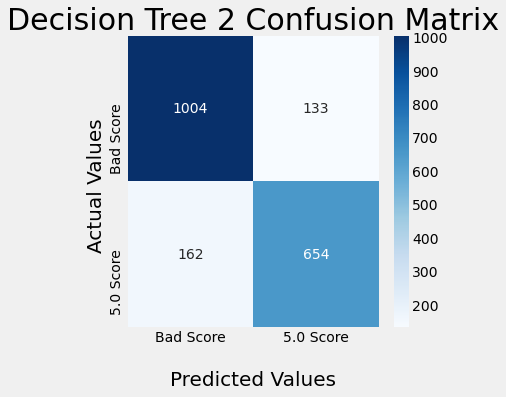

In [68]:
dt2_matrix = confusion_matrix(y_test, dt2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(dt2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Decision Tree 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

### <u>Random Forests </u>

In [69]:
rf1_clf = RandomForestClassifier(random_state=23, class_weight="balanced")
rf1_clf.fit(X_train_resampled, y_train_resampled)
rf1_y_pred = rf1_clf.predict(X_test)
get_metrics(rf1_clf, rf1_y_pred)

Precision is :78.73090481786133
F1 Score is :80.38392321535693
ROC AUC is :0.83
Cross Validation Score is :0.855


In [ ]:
rf1_matrix = confusion_matrix(y_test, rf1_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(rf1_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Random Forests 1 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

### <u>Random Forests 2</u>

#### GridSearch CV

In [70]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [71]:
rf2_clf = RandomForestClassifier(random_state=23)


rf1_grid_search= GridSearchCV(rf2_clf, rf_param_grid, scoring = 'precision', cv=3)
rf1_grid_search.fit(X_train_resampled, y_train_resampled)

print("")
print(f"Random Forest  Optimal Parameters: {rf1_grid_search.best_params_}")


Random Forest  Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}


In [72]:
rf2_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 6,
                                min_samples_split= 5, n_estimators= 10, random_state=23,
                                class_weight='balanced')
rf2_clf.fit(X_train_resampled, y_train_resampled)
rf2_y_pred = rf2_clf.predict(X_test)
get_metrics(rf2_clf, rf2_y_pred)

Precision is :80.25851938895417
F1 Score is :81.94361127774445
ROC AUC is :0.84
Cross Validation Score is :0.858


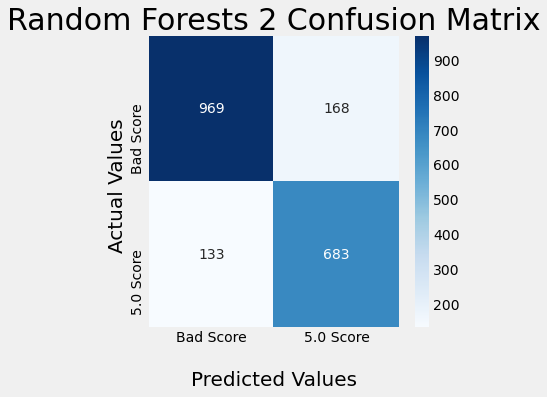

In [73]:
rf2_matrix = confusion_matrix(y_test, rf2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(rf2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Random Forests 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

### <u>XGBoost Model</u>

In [74]:
# Instantiate XGBClassifier
clf = XGBClassifier(random_state=23)

# Fit XGBClassifier
xg1 = clf.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
xg1_y_pred = clf.predict(X_test)
get_metrics(xg1, xg1_y_pred)

Precision is :78.57142857142857
F1 Score is :80.35928143712574
ROC AUC is :0.83
Cross Validation Score is :0.851


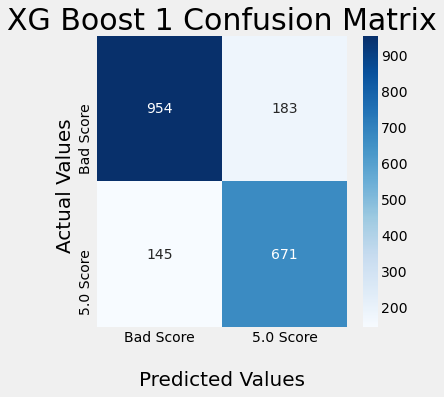

In [75]:
xg1_matrix = confusion_matrix(y_test, xg1_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg1_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 1 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### GridSearch

In [76]:
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

### <u>XGBoost 2</u>

In [77]:
xg2 = XGBClassifier(random_state=23)

grid_clf = GridSearchCV(xg2, boost_param_grid, scoring='precision', cv=3, n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7


In [78]:
xg2 = XGBClassifier(learning_rate= 0.1, max_depth=6, min_child_weight=2,
                                n_estimators=100, subsample=0.7, random_state=23)
xg2.fit(X_train_resampled, y_train_resampled)
xg2_y_pred = xg2.predict(X_test)
get_metrics(xg2, xg2_y_pred)

Precision is :79.26689576174113
F1 Score is :81.94197750148017
ROC AUC is :0.84
Cross Validation Score is :0.856


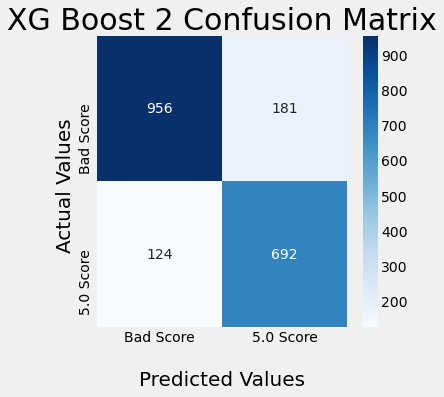

In [79]:
xg2_matrix = confusion_matrix(y_test, xg2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(xg2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('XG Boost 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5.0 Score'])
ax.yaxis.set_ticklabels(['Bad Score','5.0 Score'])

## Display the visualization of the Confusion Matrix.
plt.show()

## <b>Model Selection = Decision Tree 2<b>

In [80]:
#baseline metrics
get_metrics(dt1, dt1_y_pred)

Precision is :77.61557177615572
F1 Score is :77.8998778998779
ROC AUC is :0.81
Cross Validation Score is :0.833


In [81]:
get_metrics(dt2, dt2_y_pred)

Precision is :83.10038119440915
F1 Score is :81.59700561447286
ROC AUC is :0.84
Cross Validation Score is :0.848


In [82]:
get_metrics(rf2_clf, rf2_y_pred)

Precision is :80.25851938895417
F1 Score is :81.94361127774445
ROC AUC is :0.84
Cross Validation Score is :0.858


In [83]:
get_metrics(xg2, xg2_y_pred)

Precision is :79.26689576174113
F1 Score is :81.94197750148017
ROC AUC is :0.84
Cross Validation Score is :0.856


### Model Evaluation:
- <b> Precision: </b> This Model correctly picks whether a rental will have an overall AirBnb rating between 4.9-5.0, 83% of the time.
    - This is 33% better than random guessing.
    - The Final Model is also a improvement over the baseline model. (about 7% better)
- <b>F1 Score: </b> While Random Forests 2 had a better F1 Score, Decision Tree 2's F1 Score is only slightly worse. The F1 Score indicates that Precision is reasonably balanced with Recall, so I don't need to worry about this being an unbalanced and un-usable model. Therefore I'm fine choosing a model with a lower F1 in order to get more precsision.
- <b> ROC AUC Score: </b> Shows the True Positive Rate vs. the False Postive Rate. While Random Forests 2 performed better, my ultimate concern was Precision, and this model has a slightly lower AUC score, so I am comfortable choosing Decision Tree 2 in order to get the extra Precision.
- <b> Cross Validation Score: </b> This model performs fairly well on data that it was not trained on and is comporable to the Cross Validation Scores of the other models. 

### Final Model Confusion Matrix

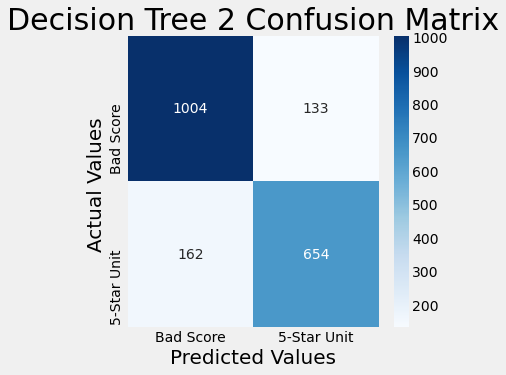

In [84]:
dt2_matrix = confusion_matrix(y_test, dt2_y_pred)

fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(dt2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Decision Tree 2 Confusion Matrix', fontsize = 30);
ax.set_xlabel('Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad Score','5-Star Unit'])
ax.yaxis.set_ticklabels(['Bad Score','5-Star Unit'])

## Display the visualization of the Confusion Matrix.
plt.show()

### How to use This Model going forward:
- OPM can take the data from new clients and run the model to determine whether they are performing at 5-Star level or not.
- If they are, they should be able to obtain Superhost status and OPM can focus on helping them <b> maintain </b> everything that they are doing right.
- If they are not a 5-Star rental unit, OPM can give them advice and help get them to 5-Star status.

Caveats: 
- No model is perfect, and this one certainly isn't.
- That said, it can be reliably trusted as only 133 records from the test set of 1,953 were incorrectly labeled as being 5-Star Units when they were, in fact, not. (We aren't worried about the ones that were predicted to be not 5-Star incorrectly)
-- This is 7% of the dataset. So you can reasonably say that 9 out of 10 times, the prediction is correct.

## <b>Feature Evaluation:</b>
- Now that we have determined that the model is reasonably reliable and acceptable to use for predicting whether or not an AirBnb unit is 5-Star or not, we will use the model to tell us which features have the largest impact on making that classification.

### Feature Importance

In [85]:
feature_names = list(X)
dt2_importance = dt2.feature_importances_

In [86]:
feature_importance_df = pd.DataFrame(dt2_importance, feature_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,accuracy_5_True,0.719147
4,value_5_True,0.128270
1,cleanliness_5_True,0.125362
5,communication_5_True,0.027221
2,checkin_5_True,0.000000
3,location_5_True,0.000000
6,room_type_Entire home/apt,0.000000
7,bedrooms_2+_True,0.000000
8,bookings_above_avg_True,0.000000
9,instant_bookable_True,0.000000


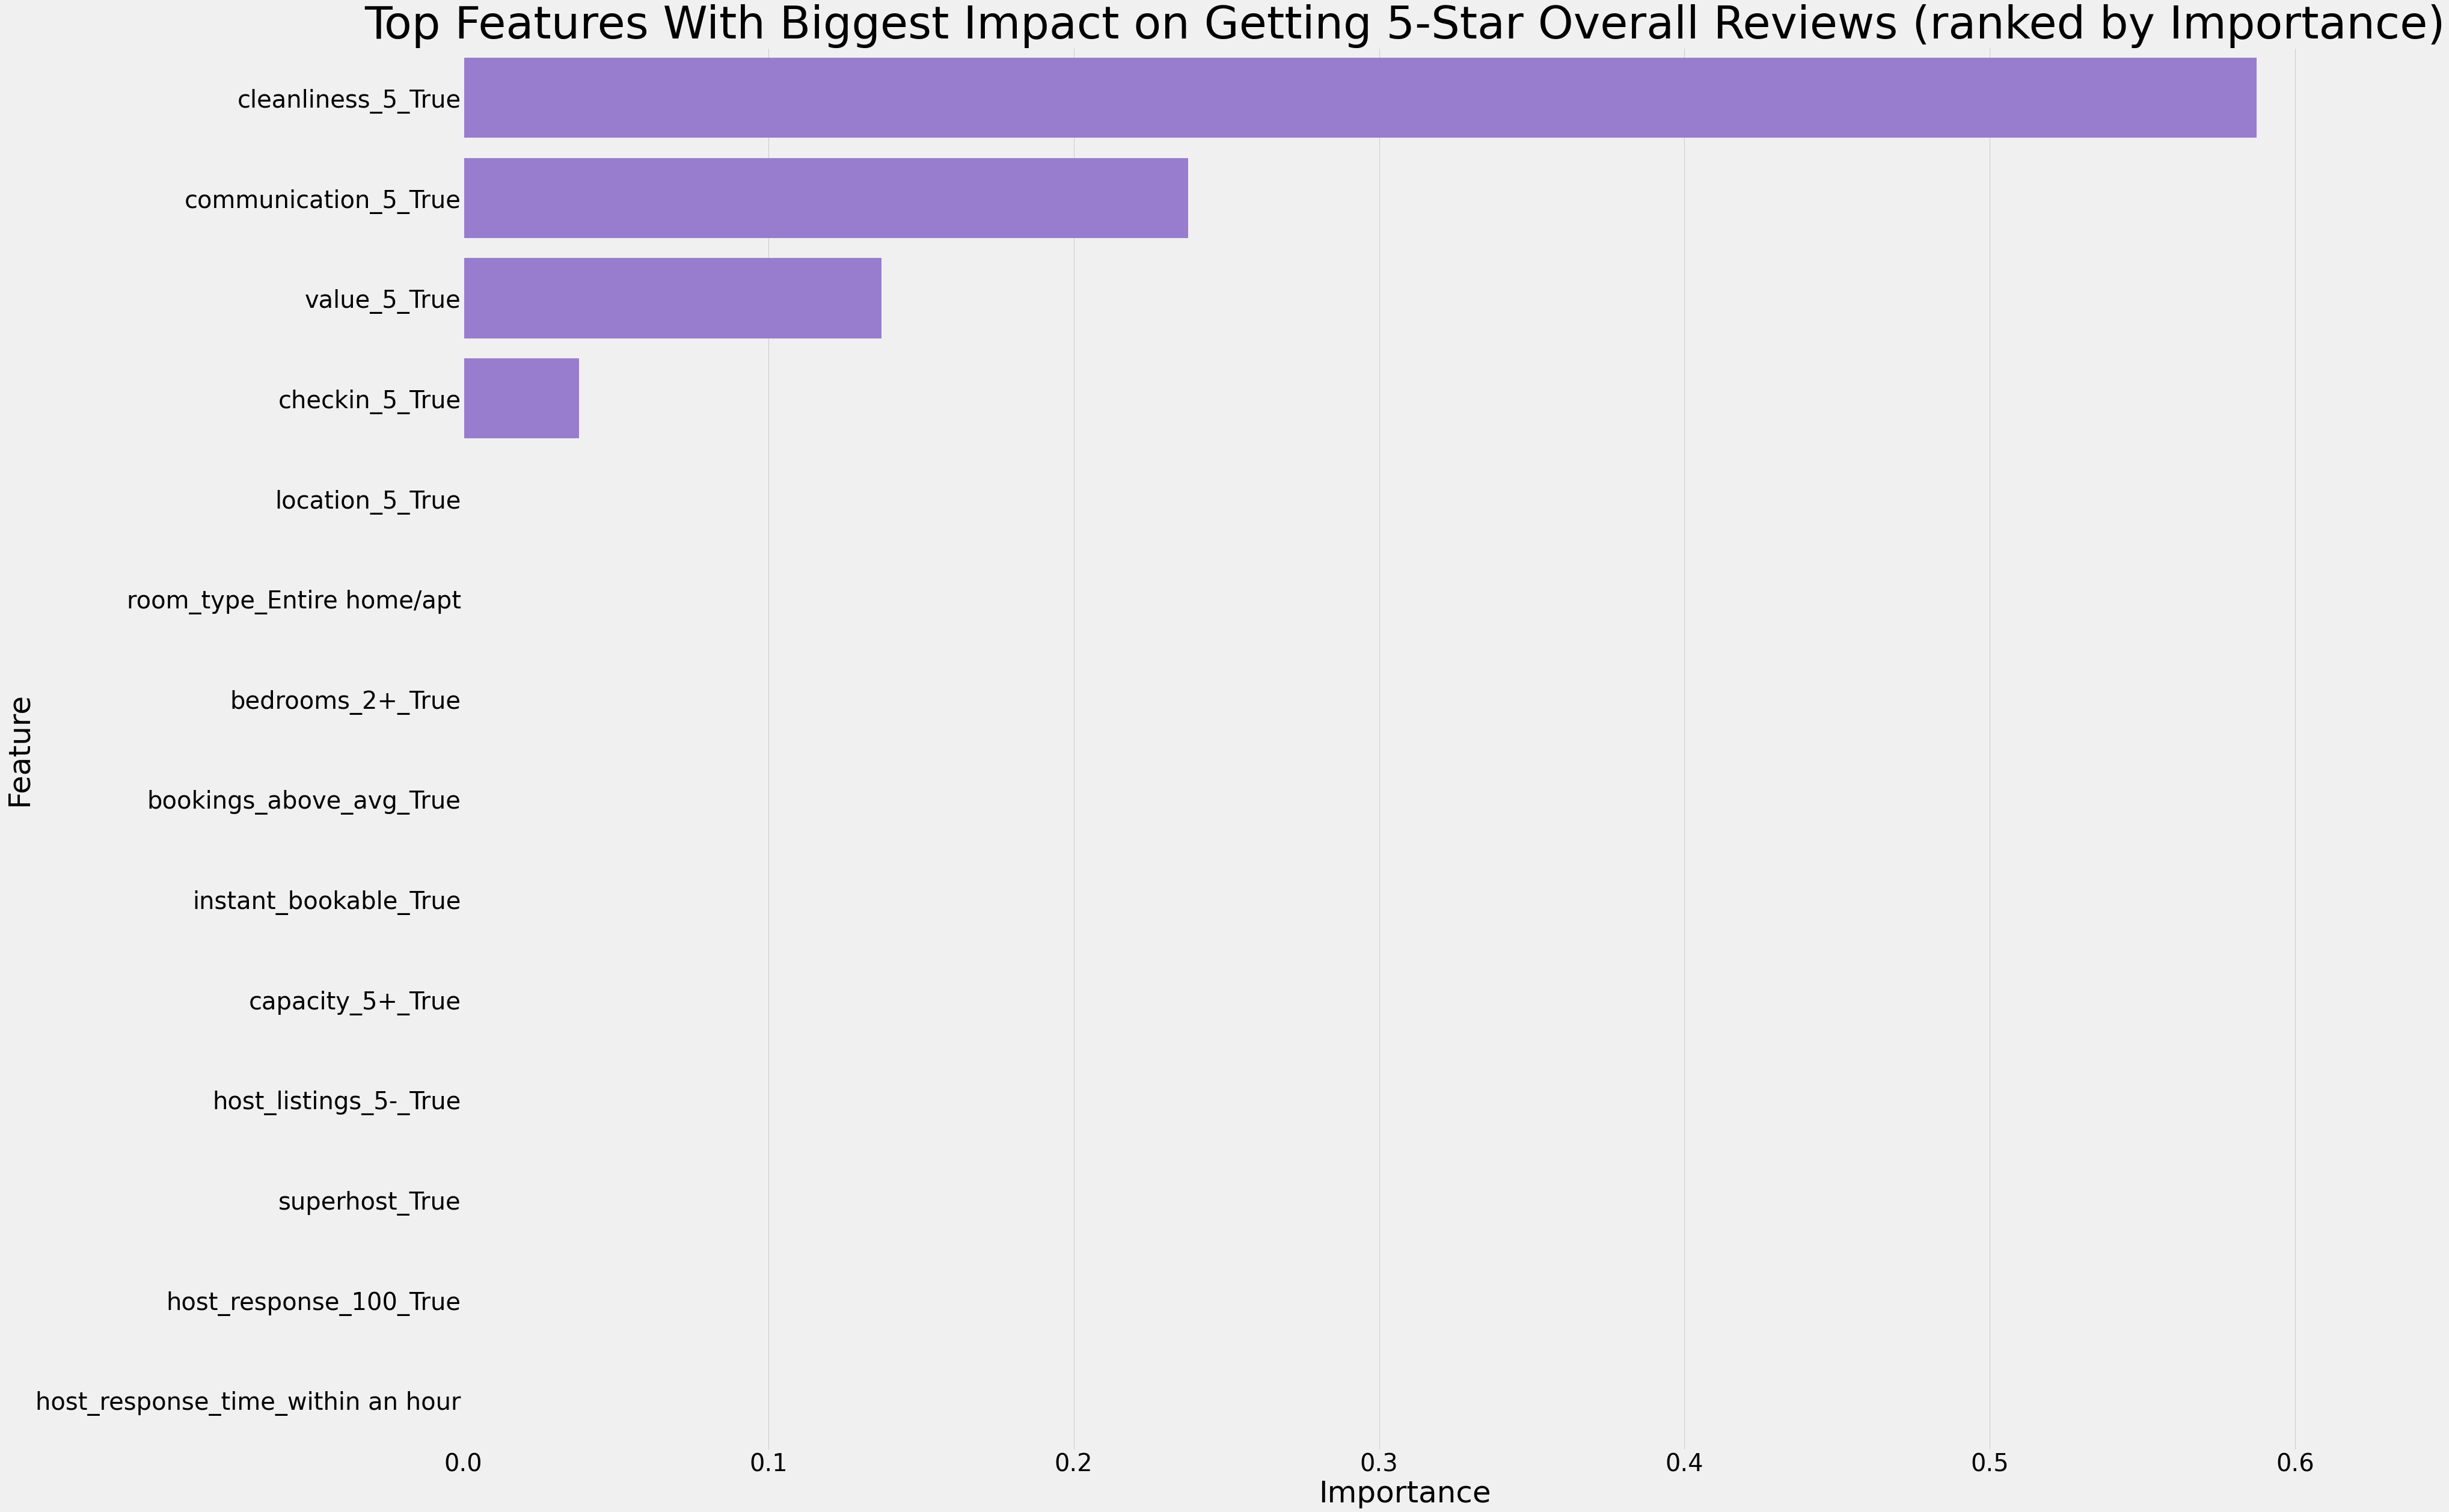

In [176]:
# plot feature importance
fig, ax = plt.subplots(figsize=(50,40))
p = sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color ='mediumpurple' );
p.set_xlabel("Importance", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

p.set_title("Top Features With Biggest Impact on Getting 5-Star Overall Reviews (ranked by Importance)", fontsize = 75)
plt.figsize=(30,20) 

plt.show();

### Analysis: 
- <b>Accuracy is by far the most important feature</b>
- <b> Value and Cleanliness are also important, but not nearly as much as Accuracy</b>
- <b>Communication</b> also has importance, but not nearly as much as the others.

### <b>Features with Little Impact on Target</b>:
- All of the other Features show 0 importance in determining our Target status. However, I suspect that they play into the Accuracy, Value, etc, and will investigate that later.

## <b>Analysis of Top Features</b>

### Review Metric DF (or Feature Analysis DF)

In [88]:
#review_metrics = balanced_df.copy()
review_metrics = df.copy()

In [89]:
review_metrics.drop(['review_scores_rating', 'review_scores_cleanliness', 'review_scores_value',
                    'review_scores_accuracy', 'review_scores_communication', 'review_scores_location',
                    'review_scores_checkin', 'accommodates', 'price', 'calculated_host_listings_count',
                    'availability_30', 'availability_90', 'availability_365', 'host_response_rate',
                    'host_id', 'bedrooms', 'beds', 'availability_30_rate', 'availability_90_rate'
                    ], axis=1, inplace=True)

In [90]:
review_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 10933
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant_bookable    7810 non-null   bool   
 1   property_type       7810 non-null   object 
 2   room_type           7810 non-null   object 
 3   amenities           7810 non-null   object 
 4   host_response_time  7810 non-null   object 
 5   host_is_superhost   7810 non-null   object 
 6   host_listings_5-    7810 non-null   bool   
 7   capacity_5+         7810 non-null   bool   
 8   bedrooms_2+         7810 non-null   bool   
 9   booked_rate_30      7810 non-null   float64
 10  booked_rate_90      7810 non-null   float64
 11  bookings_above_avg  7810 non-null   bool   
 12  host_response_100   7810 non-null   bool   
 13  superhost           7810 non-null   bool   
 14  5_star              7810 non-null   bool   
 15  accuracy_5          7810 non-null   bool   
 16  clean

In [91]:
review_metrics.drop([ 
    'host_is_superhost', 'host_response_time',
                     'amenities', 'room_type', 'property_type'], axis=1, inplace=True)

In [92]:
#pd.set_option("display.precision", 6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Function get_stats( )

In [97]:
def get_stats(df):
    
    df_transposed = df.transpose()
    df_transposed = df_transposed.reset_index()
    df_transposed.rename(columns={'index': 'Metric'}, inplace=True)
    stats_df = df_transposed
    delta = stats_df.apply(lambda x: x[1.0] - x[0.0], axis=1)
    stats_df['delta'] = delta
         
    return stats_df. sort_values('delta', ascending=False)

### Target Analysis:  <b> 5 Star Units </b>

In [98]:
five_star_metrics = review_metrics.groupby('5_star').mean()
five_star_stats = get_stats(five_star_metrics)
#five_star_stats.sort_values(True, ascending=False)
five_star_stats


5_star,Metric,False,True,delta
9,accuracy_5,0.234,0.893,0.659
10,cleanliness_5,0.190,0.778,0.587
13,value_5,0.059,0.554,0.494
14,communication_5,0.474,0.929,0.455
11,checkin_5,0.534,0.913,0.379
12,location_5,0.448,0.797,0.349
8,superhost,0.422,0.637,0.215
1,host_listings_5-,0.541,0.755,0.214
7,host_response_100,0.692,0.789,0.096
6,bookings_above_avg,0.460,0.538,0.078


### Analysis: 
- Most Notably, 5-Star Units have the biggest difference in the Top Features: accuracy, cleanliness, value, and communication.
- 5 Star Overall units score much higher in review metrics. This makes sense because they should have to score high in all of them to get a high overall score (even though it is a seperate metric in terms of AirBnb).
- they are also more likely to be a superhost, and more likely to have less than 5 listings.
- They are less likely to have high Capacity, or use Instant Book feature, but the differences aren't major.

5 Star Units stats:
- 79% have perfect response rate.
- 76% have less than 5 listings
- 64% are Superhosts
- 54% of them have more bookings than the overall overage rate.

While they perform better than other units on review metrics, there is still much room for improvement.


### <b>Key Metric: Availability </b>
- The more your units are booked, the better!
- better evaluation of success than price as price is so relative. Everyone wants to be booked though.

#### <b> bookings above average </b>

In [181]:
booked_metrics = review_metrics.groupby('bookings_above_avg').mean()
#booked_metrics.drop(['booked_rate_30', 'booked_rate_90'], axis=1, inplace=True)
booked_stats = get_stats(booked_metrics)
#booked_stats.sort_values(True, ascending=False)
booked_stats

bookings_above_avg,Metric,False,True,delta
5,booked_rate_90,0.247,0.796,0.549
4,booked_rate_30,0.484,0.885,0.401
1,host_listings_5-,0.547,0.715,0.168
12,location_5,0.542,0.648,0.105
14,communication_5,0.618,0.711,0.093
11,checkin_5,0.648,0.738,0.090
9,accuracy_5,0.467,0.553,0.086
7,superhost,0.473,0.552,0.079
8,5_star,0.381,0.456,0.076
13,value_5,0.236,0.296,0.060


#### Analysis:
- There aren't any major differences between units that book better than average and those who don't.
-However:
- Superhosts perform better than 5-Star Units (55% vs. 45%)
- Units that book above average are 11% LESS likely to use Instant Booking.
-- only 42% use Instant Book.

#### Lineplot: 5-Star vs Availabilty

In [182]:
host_listings = analysis_df.sort_values('calculated_host_listings_count', ascending=True)
#host_listings = analysis_df[analysis_df['calculated_host_listings_count'] <= 50]
#host_listings = host_listings.sort_values('calculated_host_listings_count', ascending=True)

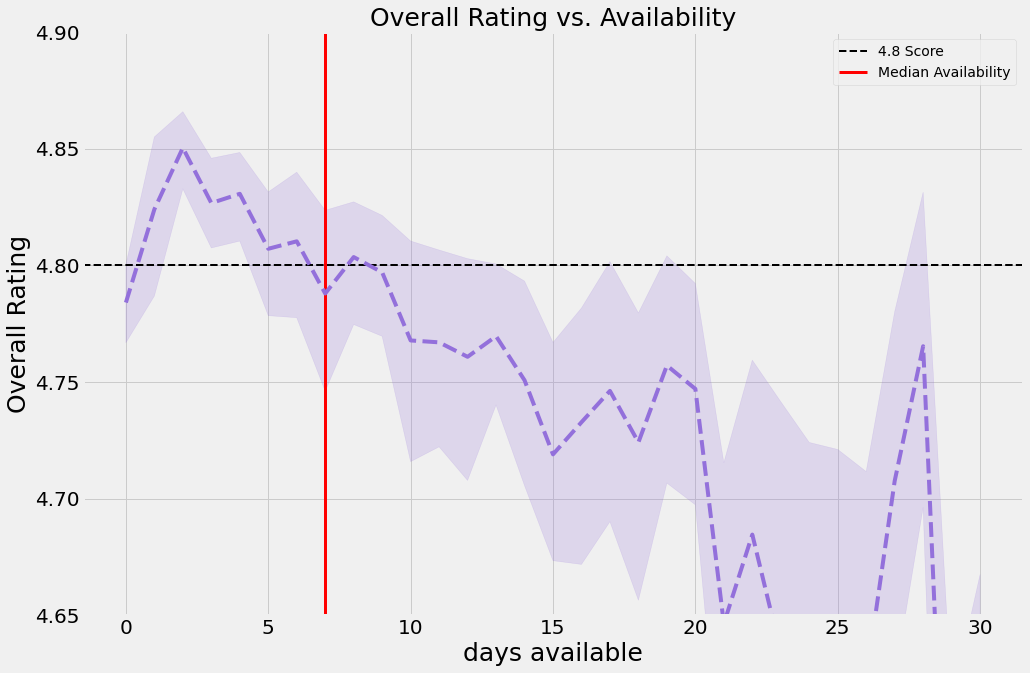

In [183]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
#ax.invert_xaxis()


p = sns.lineplot(data=host_listings, x='availability_30', y='review_scores_rating',
                 ls = '--', color ='mediumpurple' );

#p = sns.lineplot(data=host_listings, x='availability_90', y='review_scores_rating',
#                 ls = '--', color ='mediumpurple' );



#p.set_xlim(0,20)
p.set_ylim(4.65, 4.9)

p.set_ylabel("Overall Rating", fontsize = 25)

p.set_xlabel("days available", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Availability", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### Interpret This Lineplot!

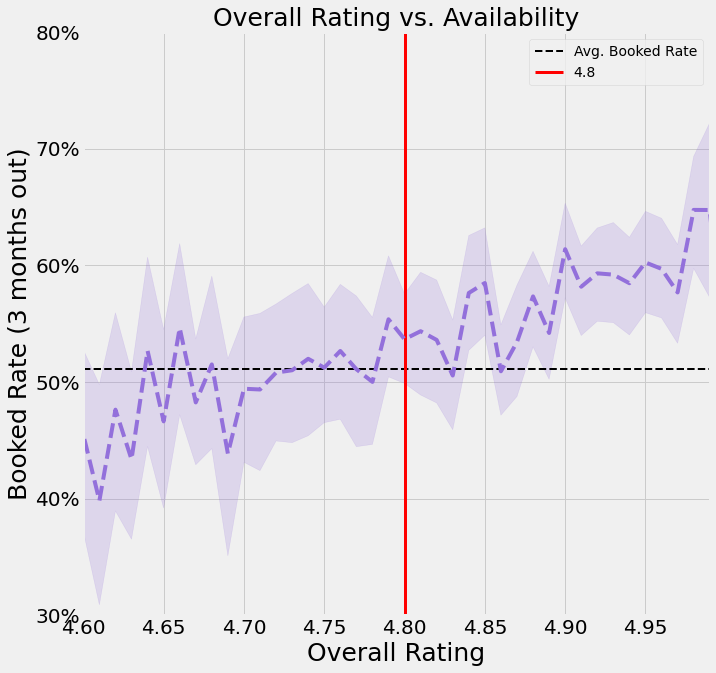

In [185]:
fig, ax = plt.subplots(figsize=(10,10))

ax.axhline(.511, ls='--', color='black', linewidth=(2), label='Avg. Booked Rate')
ax.axvline(4.80 , color='red', linewidth=(3), label='4.8')
#ax.invert_xaxis()


#p = sns.lineplot(data=superhost_df, x='availability_30', y='review_scores_rating',
#                 ls = '--', color ='green' );


#p = sns.lineplot(data=superhost_df, x='booked_rate_30', y='review_scores_rating',
#                 ls = '--', color ='green' );

p = sns.lineplot(data=host_listings, x='review_scores_rating', y='booked_rate_90',
                 ls = '--', color ='mediumpurple' );

#p = sns.lineplot(data=host_listings, x='review_scores_rating', y='booked_rate_30',
#                 ls = '--', color ='green' );


p.set_xlim(4.6 , 4.99)
p.set_ylim(.3, .8)

p.set_xlabel("Overall Rating", fontsize = 25)

p.set_ylabel("Booked Rate (3 months out)", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Availability", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### LinePlot: Superhost vs. Availability

In [186]:
superhost_df = host_listings[host_listings['superhost'] == True]
not_superhost_df = host_listings[host_listings['superhost'] == False]

In [187]:
superhost_df['availability_30'].describe()

count   3999.000
mean       8.558
std        8.604
min        0.000
25%        1.000
50%        6.000
75%       14.000
max       30.000
Name: availability_30, dtype: float64

In [188]:
not_superhost_df['availability_30'].describe()

count   3811.000
mean      10.615
std        9.779
min        0.000
25%        1.000
50%        8.000
75%       18.500
max       30.000
Name: availability_30, dtype: float64

#### Analysis:
- Superhosts have a median of 5 days available (unbooked) each month.
- This is 28.6% better than average.
- Non-Superhosts have a median of 8 days available (unbooked) each month.
- 14% worse than average

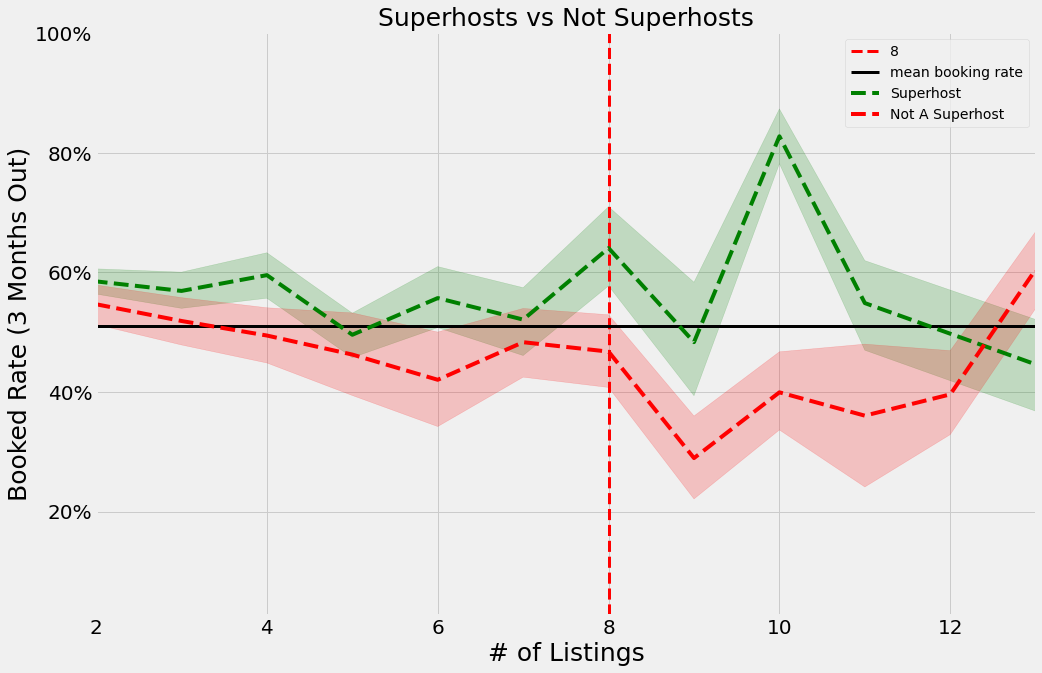

In [189]:
fig, ax = plt.subplots(figsize=(15,10))

#ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
#ax.axvline(13, ls='--', color='red', linewidth=(2), label='75% Listings')
ax.axvline(8 , ls='--', color='red', linewidth=(3), label='8')
ax.axhline(.511, color='black', linewidth=(3), label='mean booking rate')



#ax.invert_yaxis()


p = sns.lineplot(data=superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                 ls = '--', color ='green', label = 'Superhost' );

p = sns.lineplot(data=not_superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                 ls = '--', color ='red', label = 'Not A Superhost' );



p.set_xlim(2,13)
#p.set_ylim(4.65, 4.9)

p.set_ylabel("Booked Rate (3 Months Out)", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhosts vs Not Superhosts", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### lineplot: 5-star vs not 5-star

In [190]:
five_star_df = host_listings[host_listings['5_star'] == True]
not_five_star_df = host_listings[host_listings['5_star'] == False]

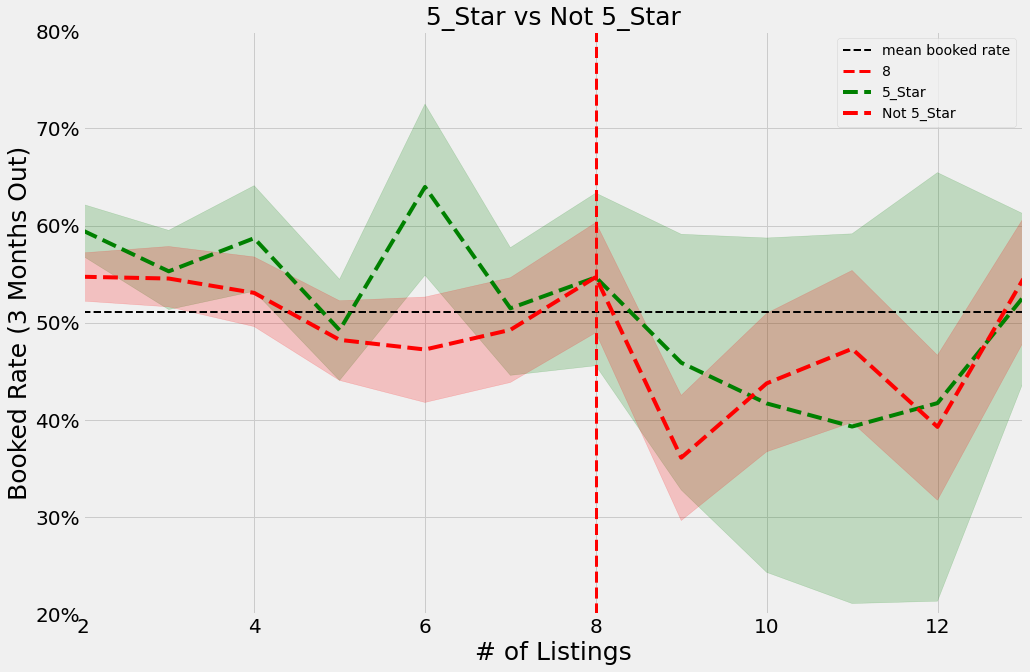

In [210]:
fig, ax = plt.subplots(figsize=(15,10))

#ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
#ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')
#ax.axvline(7 , color='red', linewidth=(3), label='Median Availability')
ax.axhline(.511, ls='--', color='black', linewidth=(2), label='mean booked rate')
ax.axvline(8 , ls='--', color='red', linewidth=(3), label='8')
#ax.invert_yaxis()


p = sns.lineplot(data=five_star_df,x='calculated_host_listings_count', y='booked_rate_90',
                ls = '--', color ='green', label = '5_Star' );

p = sns.lineplot(data=not_five_star_df,x='calculated_host_listings_count', y='booked_rate_90',
                 ls = '--', color ='red', label = 'Not 5_Star' );



p.set_xlim(2,13)
p.set_ylim(.2, .8)

p.set_ylabel("Booked Rate (3 Months Out)", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "5_Star vs Not 5_Star", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

## <b>THE PROBLEM:  Overall Rating vs. Number of Listings & Number of Days Booked</b>

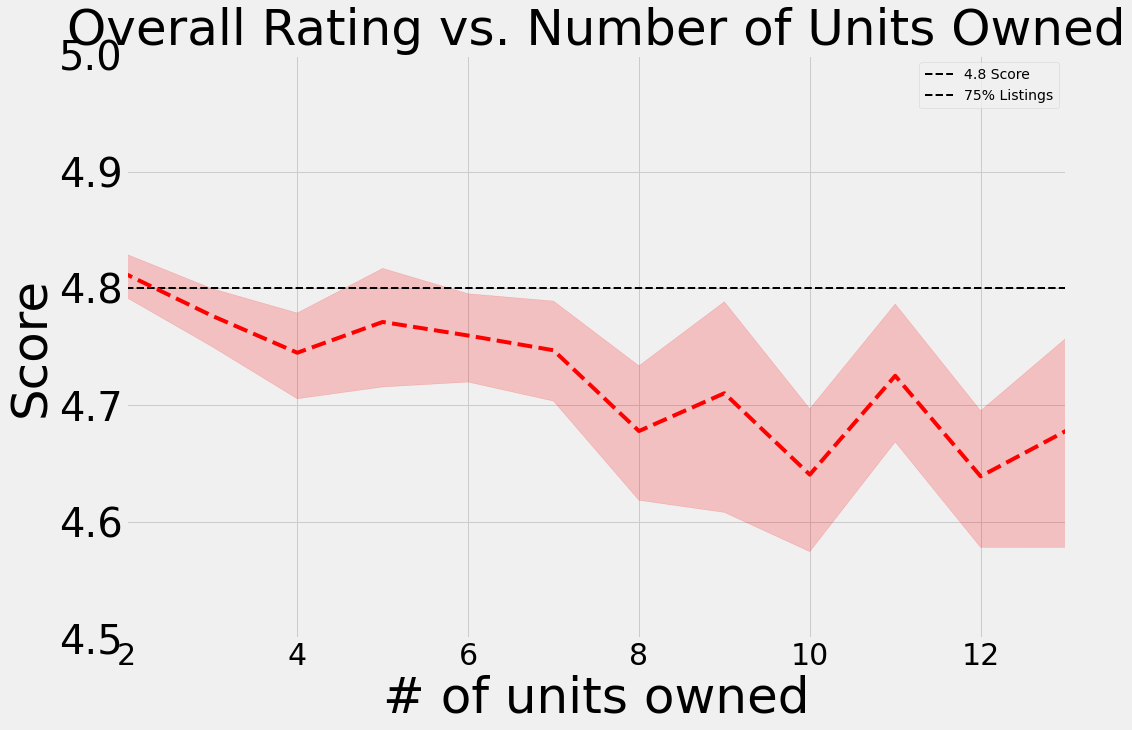

In [211]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
#ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );


p.set_xlim(2,13)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

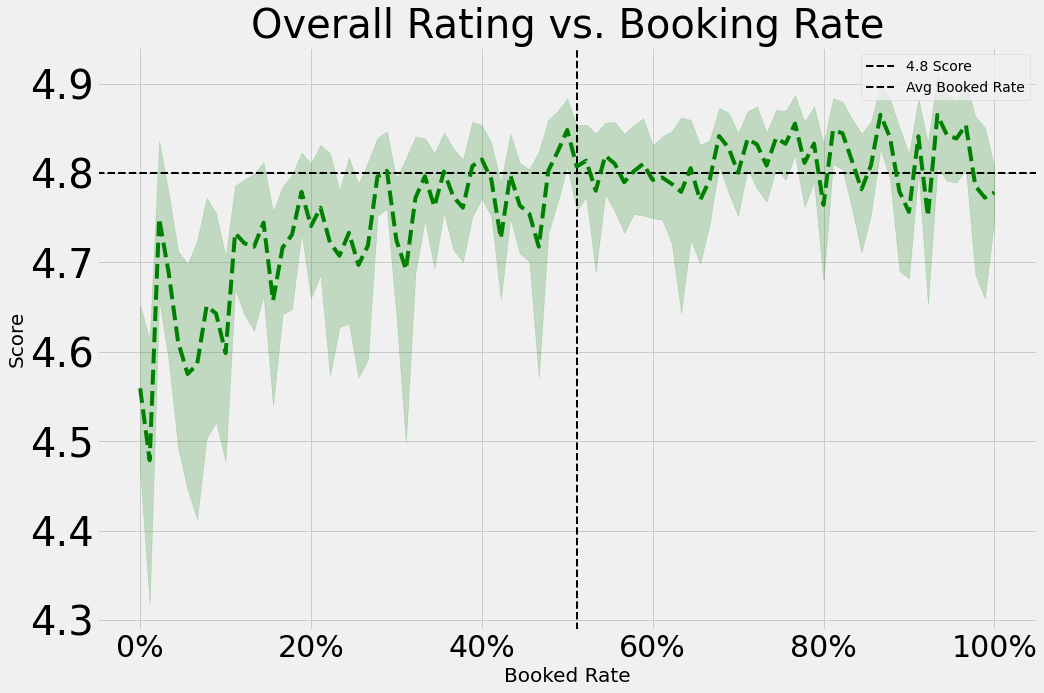

In [195]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(.511, ls='--', color='black', linewidth=(2), label='Avg Booked Rate')
#ax.axvline(13, ls='--', color='black', linewidth=(2), label='75% Listings')

p = sns.lineplot(data=host_listings, x='booked_rate_90', y='review_scores_rating',
                 ls = '--', color ='green' );


#p.set_xlim(2,13)
#p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 20)

p.set_xlabel("Booked Rate", fontsize = 20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Overall Rating vs. Booking Rate", fontsize = 40)
#plt.figsize=(30,20) 

plt.show();

### Solutions

In [133]:
five_star_df.describe()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,availability_365,availability_30,availability_90,host_id,calculated_host_listings_count,host_response_rate,availability_30_rate,availability_90_rate,booked_rate_30,booked_rate_90
count,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,...,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000,3016.000
mean,291.131,4.970,4.951,4.921,4.962,4.969,4.931,4.881,4.716,1.902,...,159.553,8.016,38.561,119662069.170,4.592,96.467,0.267,0.428,0.733,0.572
std,377.981,0.036,0.115,0.166,0.144,0.110,0.137,0.164,3.102,1.174,...,113.334,8.703,28.101,129498758.489,7.573,13.865,0.290,0.312,0.290,0.312
min,10.000,4.900,3.000,2.000,1.000,2.000,3.000,3.000,1.000,1.000,...,0.000,0.000,0.000,24858.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,115.000,4.940,4.940,4.900,4.970,4.970,4.910,4.830,2.000,1.000,...,59.000,0.000,14.000,19070698.000,1.000,100.000,0.000,0.156,0.567,0.311
50%,188.000,5.000,4.990,4.970,5.000,5.000,4.980,4.910,4.000,1.000,...,145.000,5.000,37.000,63332605.000,2.000,100.000,0.167,0.411,0.833,0.589
75%,343.250,5.000,5.000,5.000,5.000,5.000,5.000,5.000,6.000,2.000,...,255.000,13.000,62.000,180751844.250,4.000,100.000,0.433,0.689,1.000,0.844
max,10000.000,5.000,5.000,5.000,5.080,5.000,5.000,5.000,16.000,11.000,...,365.000,30.000,90.000,449582519.000,48.000,100.000,1.000,1.000,1.000,1.000


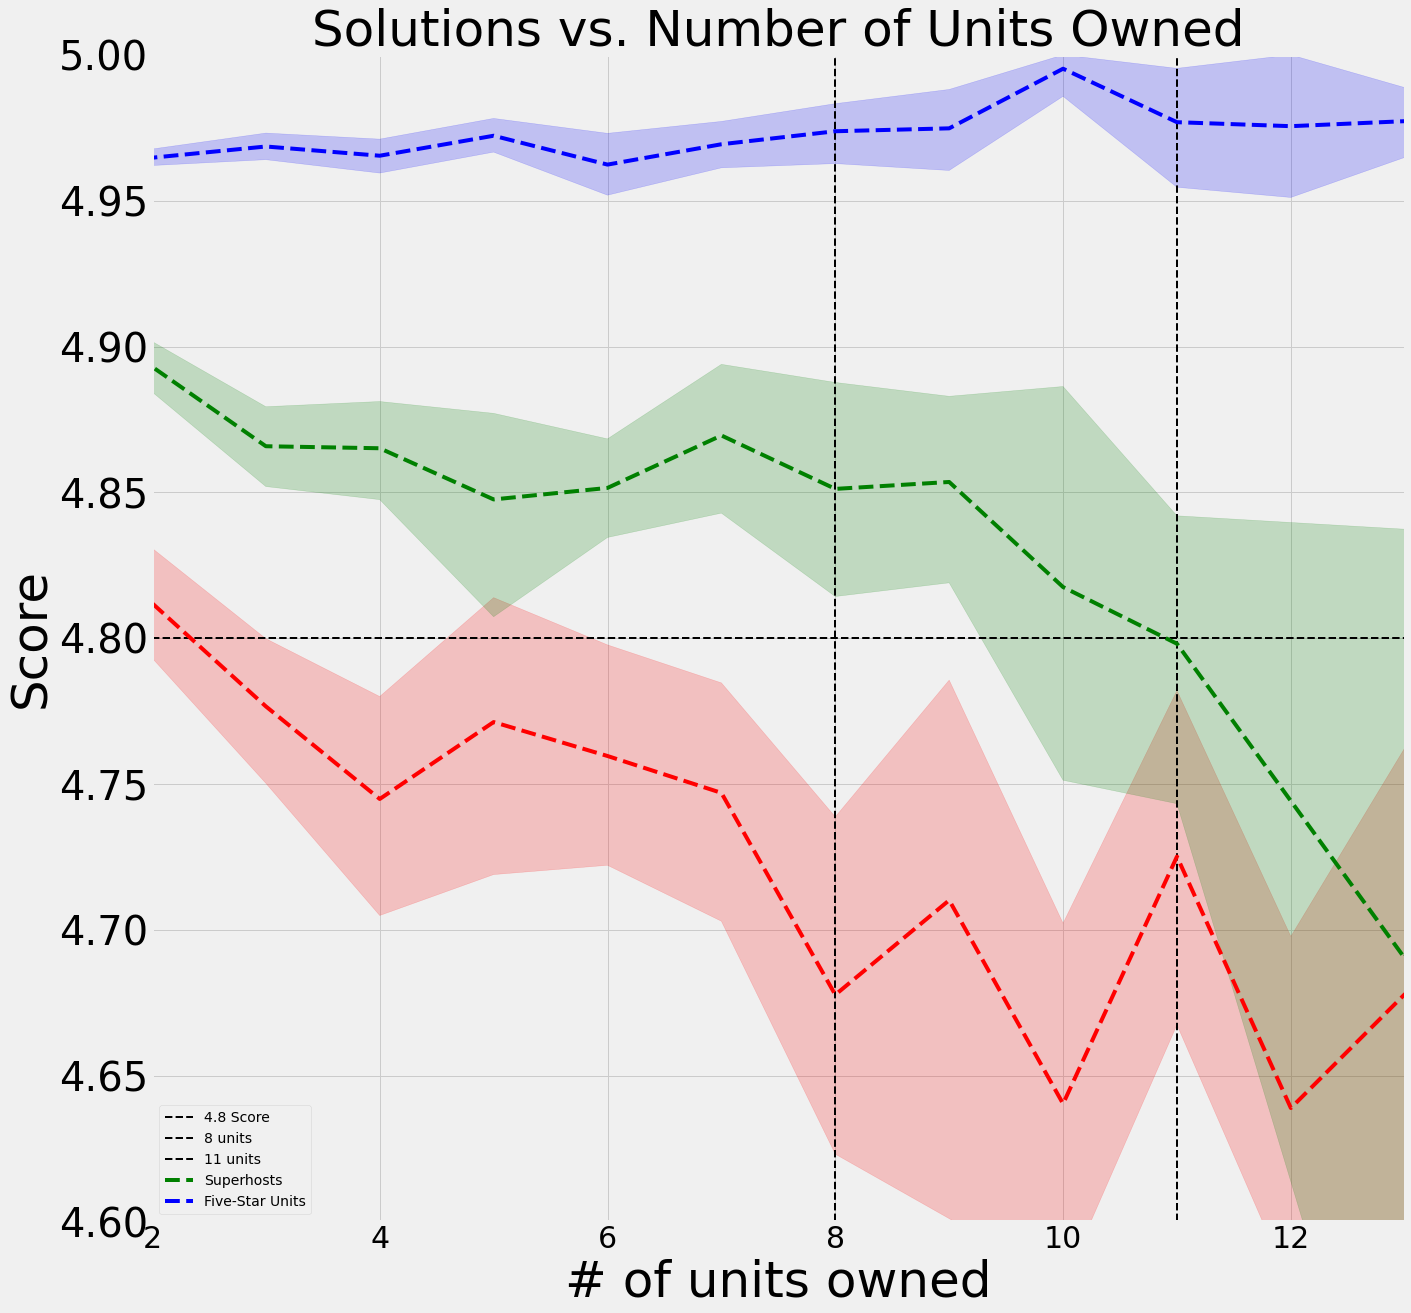

In [150]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(8, ls='--', color='black', linewidth=(2), label='8 units')
ax.axvline(11, ls='--', color='black', linewidth=(2), label='11 units')

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='red' );

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='green', label='Superhosts' );

p = sns.lineplot(data=five_star_df, x='calculated_host_listings_count', y='review_scores_rating',
                 ls = '--', color ='blue', label='Five-Star Units' );

#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
#                 ls = '--', color ='brown' );


p.set_xlim(2,13)
p.set_ylim(4.6, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("# of units owned", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Solutions vs. Number of Units Owned", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

### <b>Key Metric: Number of Units Listed </b>

In [196]:
listing_metrics = review_metrics.groupby('host_listings_5-').mean()
listing_stats = get_stats(listing_metrics)
#listing_stats.sort_values(True, ascending=False)
listing_stats

host_listings_5-,Metric,False,True,delta
6,host_response_100,0.560,0.834,0.274
14,communication_5,0.516,0.751,0.234
9,accuracy_5,0.364,0.594,0.229
8,5_star,0.277,0.501,0.223
11,checkin_5,0.552,0.775,0.223
7,superhost,0.398,0.579,0.180
5,bookings_above_avg,0.380,0.559,0.180
13,value_5,0.155,0.331,0.175
10,cleanliness_5,0.332,0.497,0.165
4,booked_rate_90,0.430,0.569,0.139


#### Analysis: Hosts who have less than 5 units listed are:
- significantly more likely to have 100% Resoonse Rate.
- significantly more likley to be a 5-Star unit.
- more likley to be a Superhost and be booked more than average.
- significantly less likely to cost less than $200/night.
- significantly less likely to have capacity for more than 4 people.
- significantly less likely to use instant book feature.

## Top Features 

### <b> Top Feature #1: Accuracy </b>

In [152]:
accuracy_df = review_metrics[review_metrics['accuracy_5'] == True]

In [153]:
accuracy_df.mean()

instant_bookable     0.413
host_listings_5-     0.735
capacity_5+          0.430
bedrooms_2+          0.516
booked_rate_30       0.711
booked_rate_90       0.549
bookings_above_avg   0.535
host_response_100    0.784
superhost            0.640
5_star               0.733
accuracy_5           1.000
cleanliness_5        0.690
checkin_5            0.891
location_5           0.759
value_5              0.468
communication_5      0.895
price_200+           0.484
dtype: float64

In [154]:
accuracy_metrics = review_metrics.groupby('accuracy_5').mean()
accuracy_stats = get_stats(accuracy_metrics)
accuracy_stats.sort_values(True, ascending=False)
#accuracy_stats

accuracy_5,Metric,False,True,delta
14,communication_5,0.425,0.895,0.469
11,checkin_5,0.487,0.891,0.404
7,host_response_100,0.679,0.784,0.104
12,location_5,0.423,0.759,0.337
1,host_listings_5-,0.521,0.735,0.214
9,5_star,0.091,0.733,0.642
4,booked_rate_30,0.651,0.711,0.060
10,cleanliness_5,0.172,0.690,0.518
8,superhost,0.379,0.640,0.261
5,booked_rate_90,0.485,0.549,0.065


#### Analysis: 
- This matches what I found in my research. The most important aspect of renting an AirBnb is that the listing is accurate, to ensure that Guest expectations are met.
- Nearly all units that have an accuracy score of 5 also scored high in the other 5 review metrics.
- Nearly all units that did not have an accuracy score of 5 did not score highly on others as well.
- <b>73% of units that scored 5.0 on accuracy were in our target 5-star range.</b>
- They are less likely to use the instant book feature or be a superhost, although about 40% of units with 5.0 accuracy do each.

<b>Also</b>
They are also less likely to be Superhosts, use Instant Booking, and have less than 5 listings.

### LinePlot: Accuracy vs. # of Listings

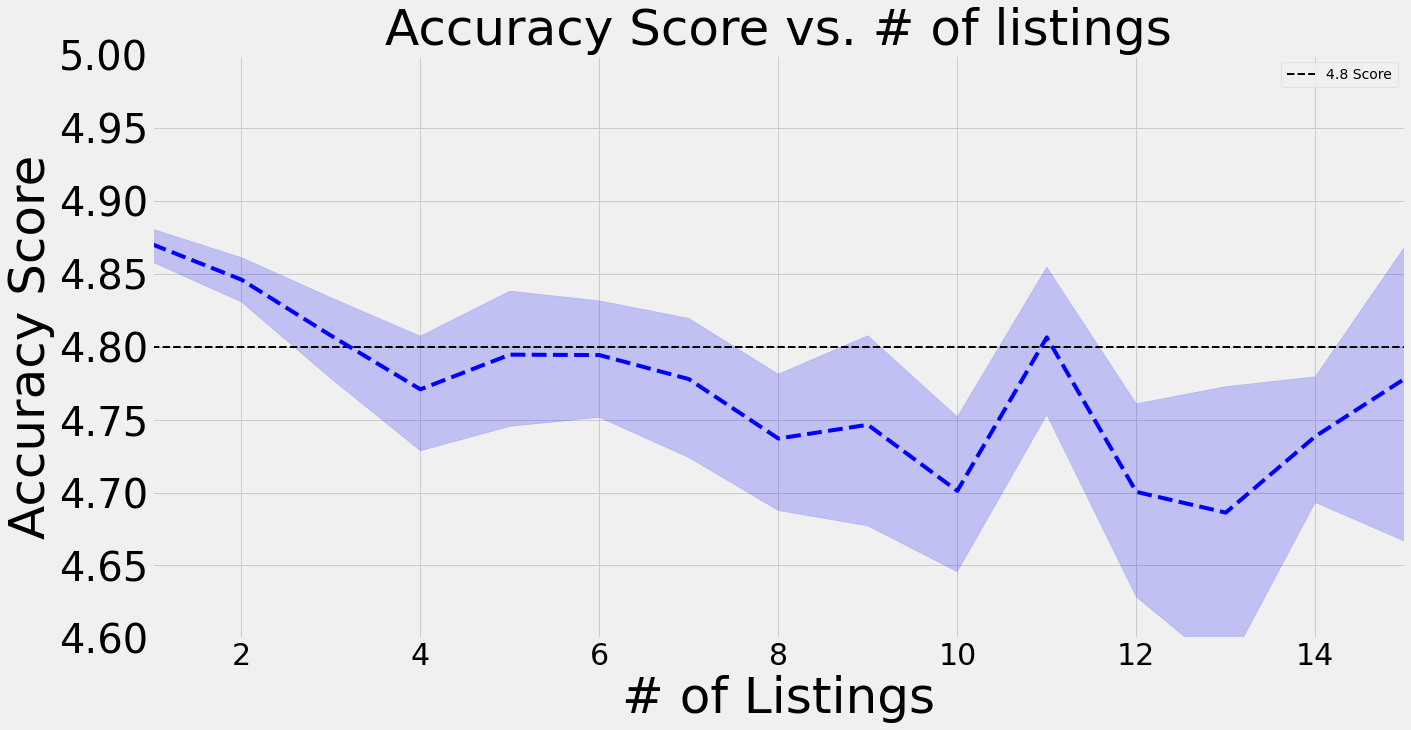

In [199]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
#ax.axvline(9.5 , color='red', linewidth=(5), label='Mean Availability')
#ax.invert_xaxis()

ax.set_xlim(1, 15)
ax.set_ylim(4.6, 5.0)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. # of listings", fontsize = 50)
#plt.figsize=(30,20) 

plt.show();

### <b>Top Feature #2: Value</b>

In [156]:
value_metrics = review_metrics.groupby('value_5').mean()
value_stats = get_stats(value_metrics)
value_stats

value_5,Metric,False,True,delta
9,5_star,0.254,0.870,0.616
10,accuracy_5,0.369,0.896,0.526
11,cleanliness_5,0.299,0.815,0.516
14,communication_5,0.568,0.930,0.362
13,location_5,0.510,0.827,0.317
12,checkin_5,0.609,0.922,0.313
1,host_listings_5-,0.574,0.784,0.209
6,bookings_above_avg,0.473,0.549,0.077
7,host_response_100,0.713,0.786,0.073
5,booked_rate_90,0.500,0.565,0.065


#### Analysis:
- Units with a perfect Value Score are significantly more likely to have higher scores on all review metrics.
- They are also more likely to be a 5-Star Unit, with 87% of units with high value being 5-Star Units.

### <b>Top Feature #3: Cleanliness</b>

In [157]:
cleanliness_metrics = review_metrics.groupby('cleanliness_5').mean()
cleanliness_stats = get_stats(cleanliness_metrics)
cleanliness_stats

cleanliness_5,Metric,False,True,delta
9,5_star,0.165,0.746,0.581
10,accuracy_5,0.279,0.806,0.527
13,value_5,0.087,0.497,0.410
14,communication_5,0.503,0.873,0.371
11,checkin_5,0.555,0.870,0.315
12,location_5,0.488,0.732,0.244
8,superhost,0.422,0.629,0.208
1,host_listings_5-,0.562,0.718,0.156
7,host_response_100,0.698,0.778,0.080
4,booked_rate_30,0.671,0.695,0.024


#### Analysis:
- More likely to scsore higher in all review metrics.
- 75% of Cleanliness 5.0 units have 5-Star Status.

### <b> Top Feature #4: Communication </b>

In [158]:
communication_metrics = review_metrics.groupby('communication_5').mean()
communication_stats = get_stats(communication_metrics)
communication_stats.sort_values(True, ascending=False)

communication_5,Metric,False,True,delta
12,checkin_5,0.331,0.876,0.545
7,host_response_100,0.625,0.787,0.162
1,host_listings_5-,0.467,0.712,0.245
4,booked_rate_30,0.632,0.706,0.074
13,location_5,0.386,0.699,0.314
10,accuracy_5,0.160,0.686,0.526
8,superhost,0.286,0.626,0.340
9,5_star,0.088,0.585,0.496
11,cleanliness_5,0.165,0.573,0.408
5,booked_rate_90,0.464,0.545,0.081


####  Analysis: 
- Clients that communicate well have significantly better scores on other review scores than those who don't.
- <b>They are 59% likely to be 5-Star Units.</b>
- It's also noticeable that clients who scored high in communication had under 5 listings, and were less likely to use instant book for their property.
-- My assumption is that they prefer a more "hands on" approach and want to make sure that they are communicating directly to the person booking the property than having the process automated and unpersonalized.

### <b>Need to Move: SuperHost</b>

In [159]:
superhost_metrics = review_metrics.groupby('superhost').mean()
superhost_stats = get_stats(superhost_metrics)
#superhost_stats.sort_values(True, ascending=False)
superhost_stats

superhost,Metric,False,True,delta
14,communication_5,0.509,0.812,0.304
11,checkin_5,0.557,0.822,0.266
9,accuracy_5,0.375,0.636,0.261
8,5_star,0.311,0.520,0.209
10,cleanliness_5,0.331,0.536,0.204
7,host_response_100,0.646,0.815,0.169
1,host_listings_5-,0.544,0.712,0.168
12,location_5,0.530,0.656,0.126
6,bookings_above_avg,0.452,0.532,0.079
4,booked_rate_30,0.646,0.715,0.069


#### Analysis: 
- <b>Superhosts have a more likely to be 5-Star Units than non-superhosts.</b>
- They also have a higher response rate than non-superhosts. Since this is a requirement of the superhost program, this isn't a surprise.
- There isn't much of a difference in the communication level of superhosts and non-superhosts.
- For most review metrics, Superhosts have a <b> lower </b> average rate than those of non-superhosts.
- Superhosts are more likely to have less than 5 listings.

## <b>Questions Answered</b>

- Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- <b> YES!.</b>
- The benefits of being a 5 Star overall host, vs not being one. (again, is it worth all the work to have 5 Star overall rating)
- <b> SLIGHTLY BETTER THAN SUPERHOST</b>
- What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)
-- <b>ACCURACY</b>
-- <b>COMMUNICATION</b>

### Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)

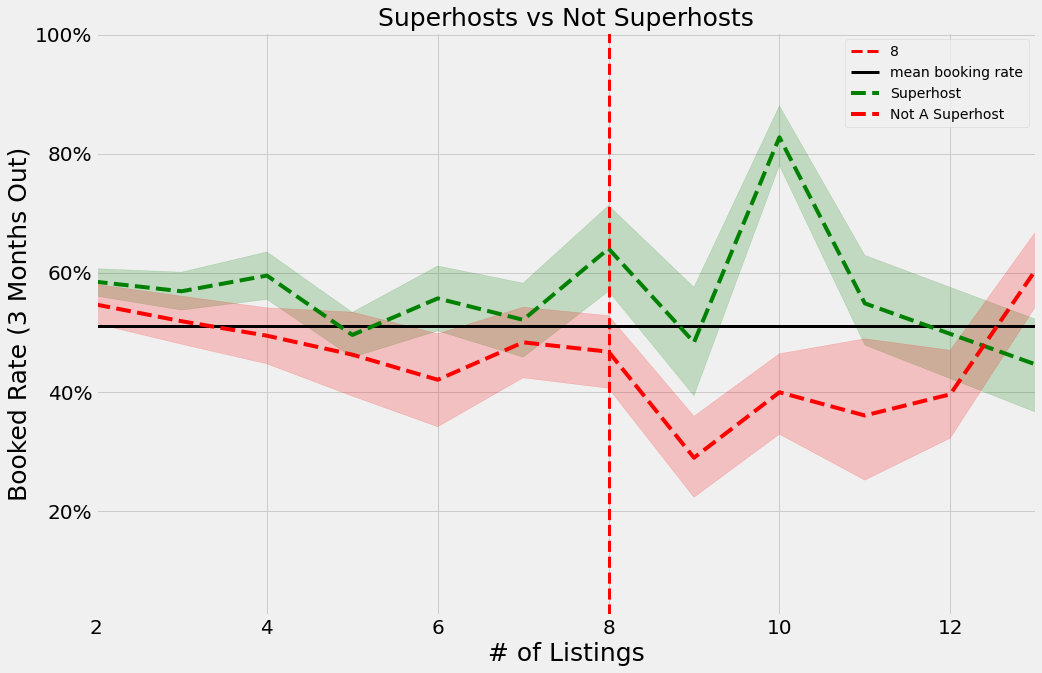

In [200]:
fig, ax = plt.subplots(figsize=(15,10))

#ax.axvline(2, ls='--', color='black', linewidth=(2), label='Median Listings')
#ax.axvline(13, ls='--', color='red', linewidth=(2), label='75% Listings')
ax.axvline(8 , ls='--', color='red', linewidth=(3), label='8')
ax.axhline(.511, color='black', linewidth=(3), label='mean booking rate')



#ax.invert_yaxis()


p = sns.lineplot(data=superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                 ls = '--', color ='green', label = 'Superhost' );

p = sns.lineplot(data=not_superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                 ls = '--', color ='red', label = 'Not A Superhost' );



p.set_xlim(2,13)
#p.set_ylim(4.65, 4.9)

p.set_ylabel("Booked Rate (3 Months Out)", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhosts vs Not Superhosts", fontsize = 25)
plt.figsize=(30,20) 

plt.show();

#### YES, Superhosts perform better
- Superhosts book have a higher booking rate.
- 

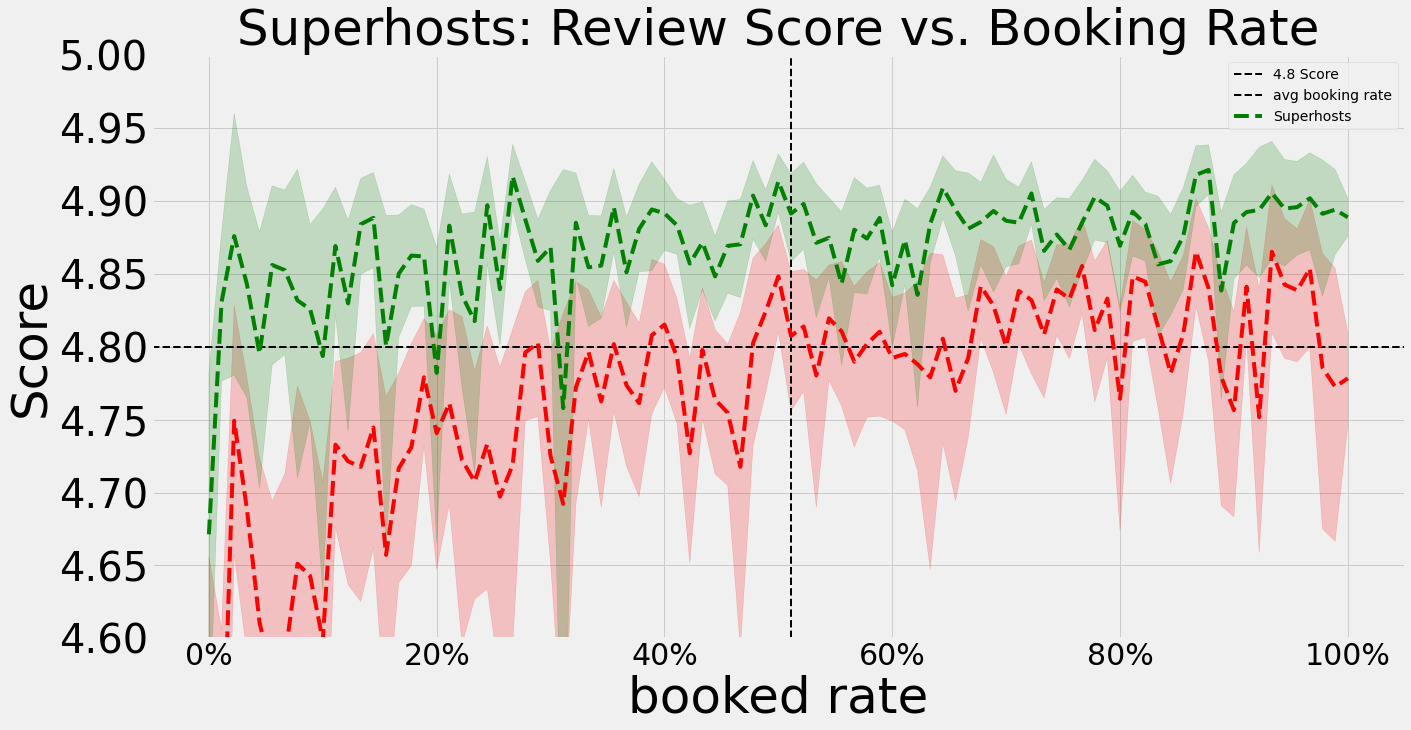

In [209]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(.511, ls='--', color='black', linewidth=(2), label='avg booking rate')
#ax.axvline(11, ls='--', color='black', linewidth=(2), label='11 units')

p = sns.lineplot(data=host_listings, x='booked_rate_90', y='review_scores_rating',
                 ls = '--', color ='red' );

p = sns.lineplot(data=superhost_df, x='booked_rate_90', y='review_scores_rating',
                 ls = '--', color ='green', label='Superhosts' );

#p = sns.lineplot(data=five_star_df, x='calculated_host_listings_count', y='review_scores_rating',
#                 ls = '--', color ='blue', label='Five-Star Units' );

#p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
#                 ls = '--', color ='brown' );


#p.set_xlim(2,13)
p.set_ylim(4.6, 5)


p.set_ylabel("Score", fontsize = 50)

p.set_xlabel("booked rate", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhosts: Review Score vs. Booking Rate", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

## <b><u>Recommendations</b></u>

### <b> Main Recommendation: Focus on helping Clients with Accuracy</b>
- 1/1 ratio with key metrics concerning 5-Star.
- Low accuracy is a big problem
- High accuracy fixes many of the problems OPM is seeking to solve

### <b>Recommendation #1: OPM offer help as an outside party in listing properties accurately.</b> 
- OPM can leverage their experience to ensure that host listings are accurate and not overly embelished. Getting high Accuracy Ratings are the KEY feature with the most influence on getting a 5.0 Overall Score.

In [216]:
five_star_stats.sort_values('delta', ascending=False).head(1)

5_star,Metric,False,True,delta
9,accuracy_5,0.234,0.893,0.659


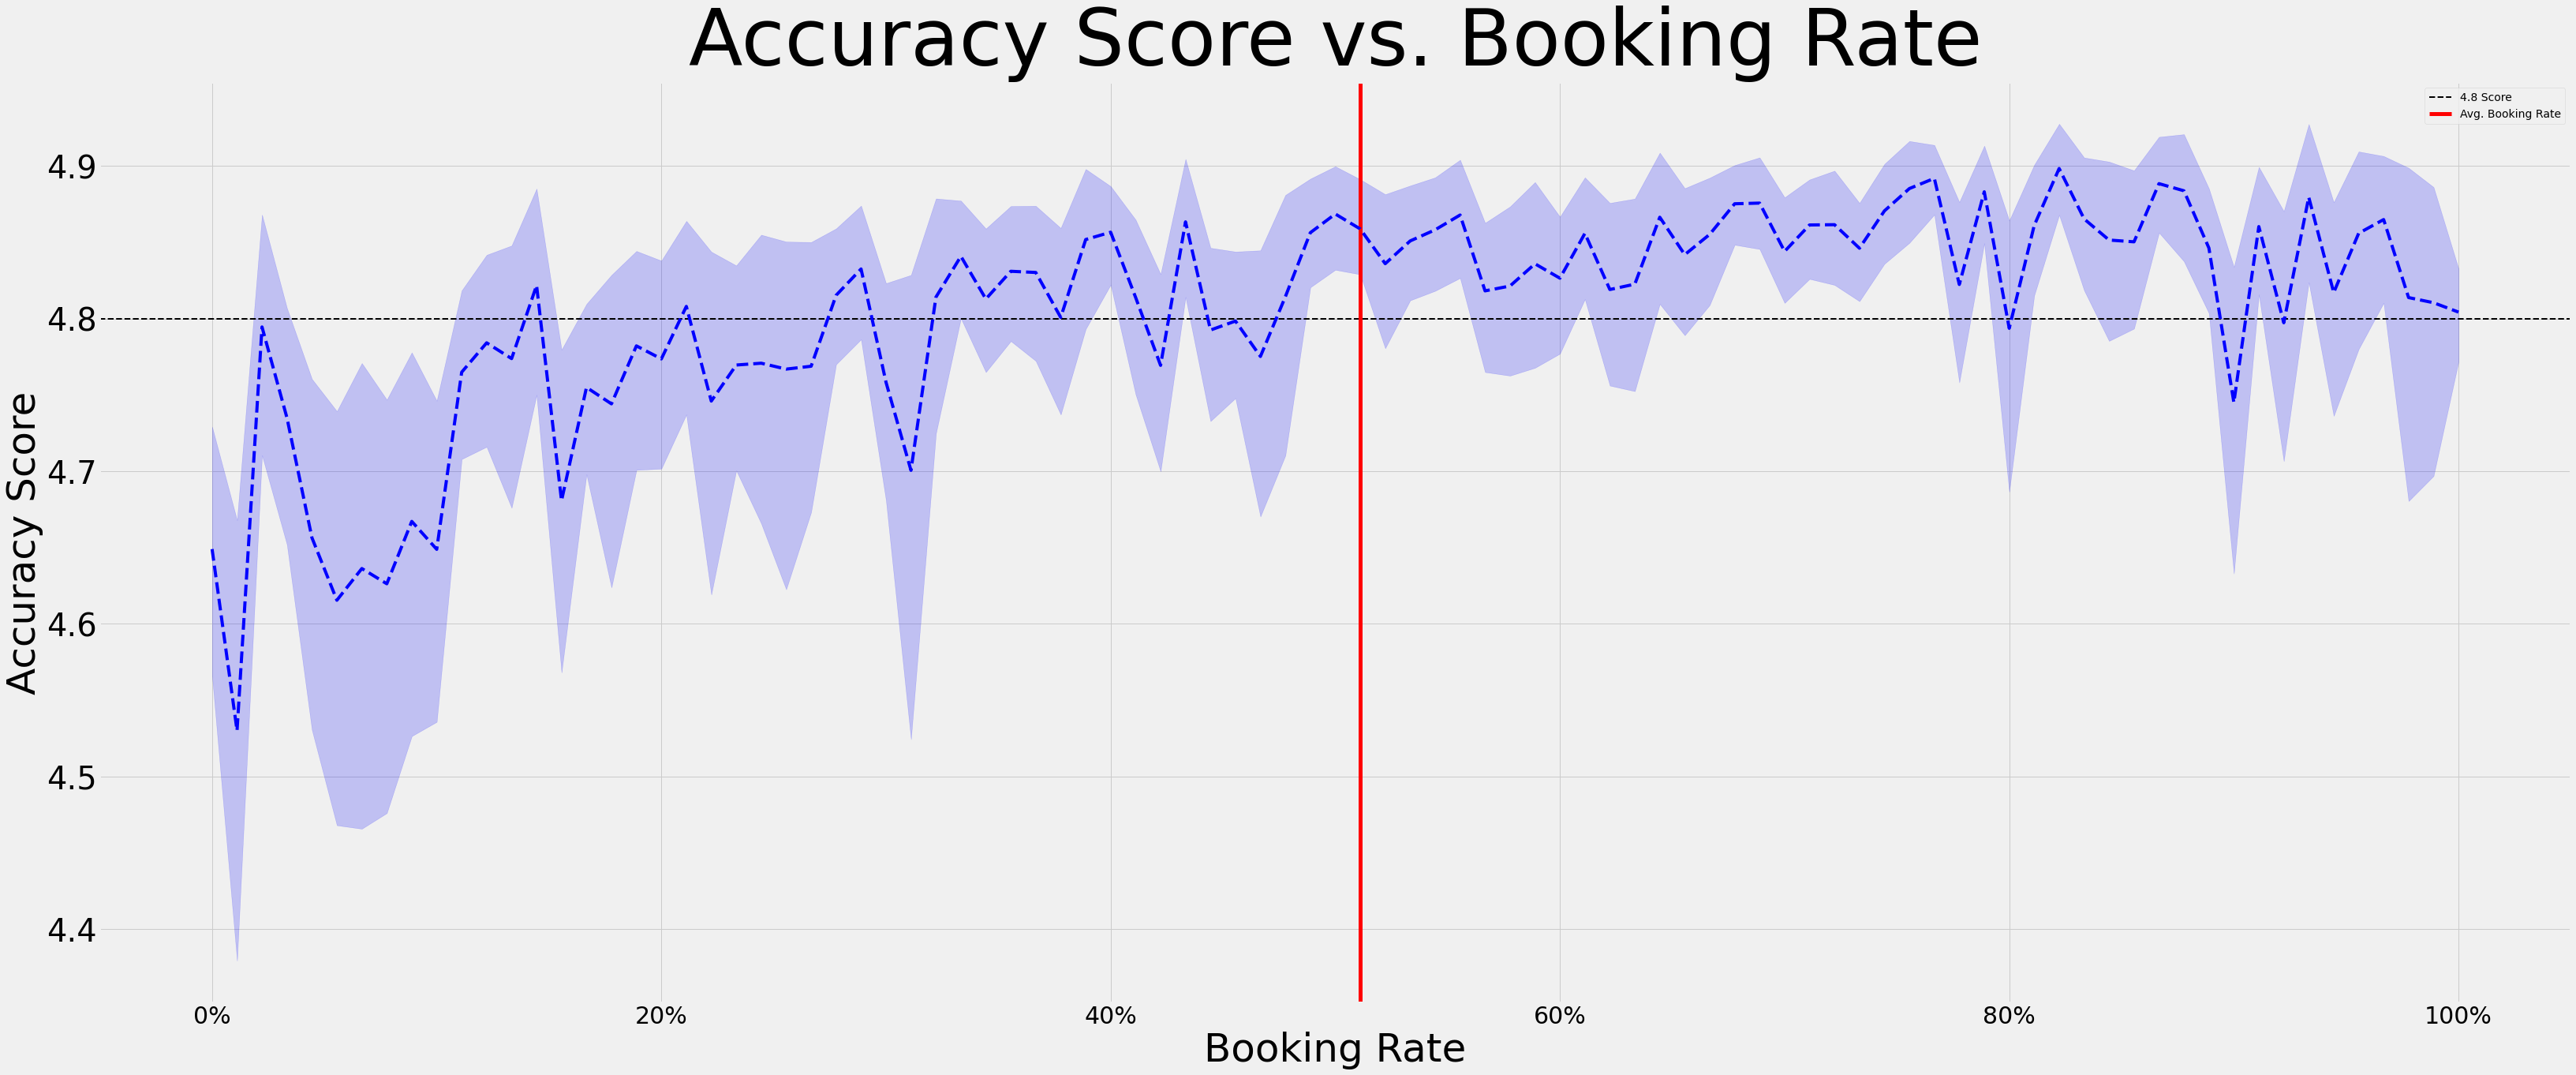

In [220]:
fig, ax = plt.subplots(figsize=(50,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(.511 , color='red', linewidth=(5), label='Avg. Booking Rate')
#ax.invert_xaxis()


p = sns.lineplot(data=host_listings, x='booked_rate_90', y='review_scores_accuracy',
                 ls = '--', color ='blue' );

#p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='green' );

#p = sns.lineplot(data=instant_bookable_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
#                 ls = '--', color ='red' );


p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("Booking Rate", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Booking Rate", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

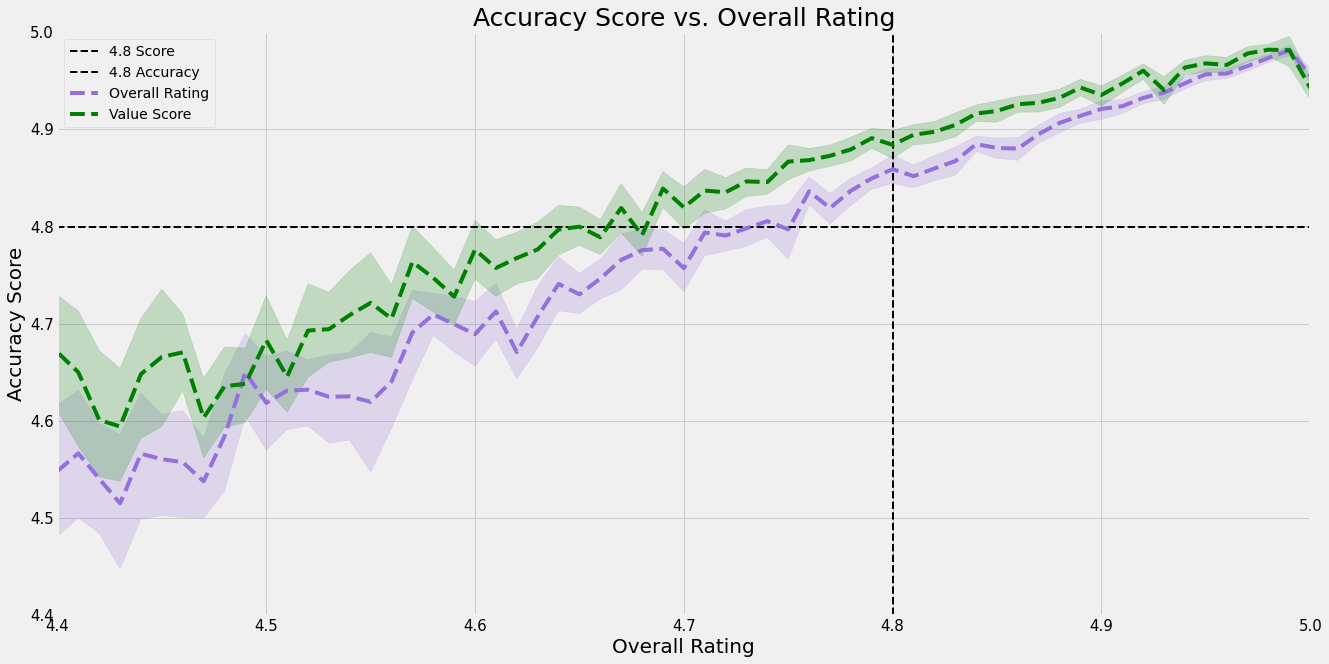

In [249]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axvline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axhline(4.8 ,ls='--', color='black', linewidth=(2), label='4.8 Accuracy')
#ax.invert_xaxis()

ax.set_xlim(4.4,5)
ax.set_ylim(4.4,5)

p = sns.lineplot(data=host_listings, x='review_scores_rating', y='review_scores_accuracy',
                 ls = '--', color ='mediumpurple', label='Overall Rating' );

p = sns.lineplot(data=host_listings, x='review_scores_value', y='review_scores_accuracy',
                 ls = '--', color ='green', label='Value Score' );

#p = sns.lineplot(data=host_listings, x='review_scores_communication', y='review_scores_accuracy',
#                 ls = '--', color ='red' );

#p = sns.lineplot(data=host_listings, x='review_scores_location', y='review_scores_accuracy',
#                 ls = '--', color ='purple' );

#p = sns.lineplot(data=host_listings, x='review_scores_cleanliness', y='review_scores_accuracy',
#                 ls = '--', color ='orange', label='Cleanliness Score' );



p.set_ylabel("Accuracy Score", fontsize = 20)

p.set_xlabel("Overall Rating", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Overall Rating", fontsize = 25)
#plt.figsize=(30,20) 

plt.show();

### <b> Recommendation #2: Advise Clients to not host more properties than they can manage. </b>
- There is a general downward trend in overall rating as the number of units owned increases. 
- The bottom drops out between 12? and 20 before picking up again.
- I interpret these spikes to show when there are enough units owned to justify bringing in more help in managing them.
- As OPM will mainly be advising owners who are doing everything on their own, I would caution against having more than they can handle to the highest level of excellance.
-- or they should get help in managing their units.

#### I recommend that single owners manage no more than 8 units on their own.
- Also, I recommend that OPM offer services that help hosts to manage units once they get close to that threashold.
-- ie, prefered cleaning services, help with accurate listings, etc.

In [223]:
host_listings.groupby('calculated_host_listings_count').mean().head(10)

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,host_response_100,superhost,5_star,accuracy_5,cleanliness_5,checkin_5,location_5,value_5,communication_5,price_200+
calculated_host_listings_count,,,,,,,,,,,,,,,,,,,,,
1,265.299,4.844,4.870,4.816,4.917,4.915,4.877,4.789,4.672,1.907,...,0.859,0.537,0.566,0.657,0.537,0.819,0.663,0.376,0.806,0.441
2,218.736,4.812,4.846,4.805,4.905,4.892,4.863,4.767,4.353,1.775,...,0.830,0.635,0.503,0.599,0.499,0.759,0.590,0.322,0.734,0.383
3,243.046,4.777,4.808,4.766,4.892,4.872,4.837,4.739,4.399,1.751,...,0.812,0.589,0.396,0.494,0.424,0.732,0.566,0.292,0.671,0.378
4,220.890,4.745,4.771,4.737,4.836,4.832,4.786,4.696,4.758,1.788,...,0.762,0.557,0.357,0.457,0.373,0.674,0.485,0.221,0.646,0.443
5,239.149,4.771,4.795,4.772,4.877,4.869,4.855,4.715,4.625,1.768,...,0.794,0.714,0.390,0.473,0.492,0.717,0.606,0.238,0.686,0.403
6,238.475,4.760,4.794,4.755,4.893,4.851,4.836,4.708,4.667,1.759,...,0.802,0.698,0.259,0.401,0.358,0.691,0.562,0.167,0.593,0.377
7,313.227,4.747,4.778,4.773,4.821,4.835,4.829,4.698,5.445,2.066,...,0.692,0.464,0.370,0.460,0.431,0.645,0.507,0.204,0.640,0.483
8,360.899,4.678,4.737,4.688,4.785,4.811,4.804,4.589,6.018,2.048,...,0.756,0.458,0.327,0.381,0.351,0.500,0.565,0.167,0.524,0.649
9,372.280,4.710,4.746,4.707,4.841,4.774,4.833,4.642,5.473,2.108,...,0.763,0.516,0.290,0.344,0.312,0.613,0.634,0.183,0.452,0.581


#### Analysis: # of units listed before average score drops below 4.8
- Overall Rating: 2
- Accuracy: 3
- Cleanliness: 2
- Check-in: 7
- Communication: 9
- Location: 9
- Value: 0

#### <b>More info in archive</b>

### <b> #3: Make 5 Star Reviews Your Priority, Get Superhost Status if Possible</b>
- superhosts show far more consistancy across the board. (ie, having a higher # of rentals does not impact them as much, even though there is an impact)

In [224]:
five_star_stats

5_star,Metric,False,True,delta
9,accuracy_5,0.234,0.893,0.659
10,cleanliness_5,0.190,0.778,0.587
13,value_5,0.059,0.554,0.494
14,communication_5,0.474,0.929,0.455
11,checkin_5,0.534,0.913,0.379
12,location_5,0.448,0.797,0.349
8,superhost,0.422,0.637,0.215
1,host_listings_5-,0.541,0.755,0.214
7,host_response_100,0.692,0.789,0.096
6,bookings_above_avg,0.460,0.538,0.078


In [225]:
five_star_stats_only = five_star_stats.drop([False, 'delta'], axis=1)
not_five_star_stats_only = five_star_stats.drop([True, 'delta'], axis=1)

In [226]:
five_star_stats_only['value'] = five_star_stats_only[True]
not_five_star_stats_only['value'] = not_five_star_stats_only[False]

In [227]:
five_star_stats_only = five_star_stats_only.sort_values('value', ascending=False)

In [228]:
not_five_star_stats_only = not_five_star_stats_only.sort_values('value', ascending=False)

In [229]:
five_star_stats_only

5_star,Metric,True,value
14,communication_5,0.929,0.929
11,checkin_5,0.913,0.913
9,accuracy_5,0.893,0.893
12,location_5,0.797,0.797
7,host_response_100,0.789,0.789
10,cleanliness_5,0.778,0.778
1,host_listings_5-,0.755,0.755
4,booked_rate_30,0.711,0.711
8,superhost,0.637,0.637
13,value_5,0.554,0.554


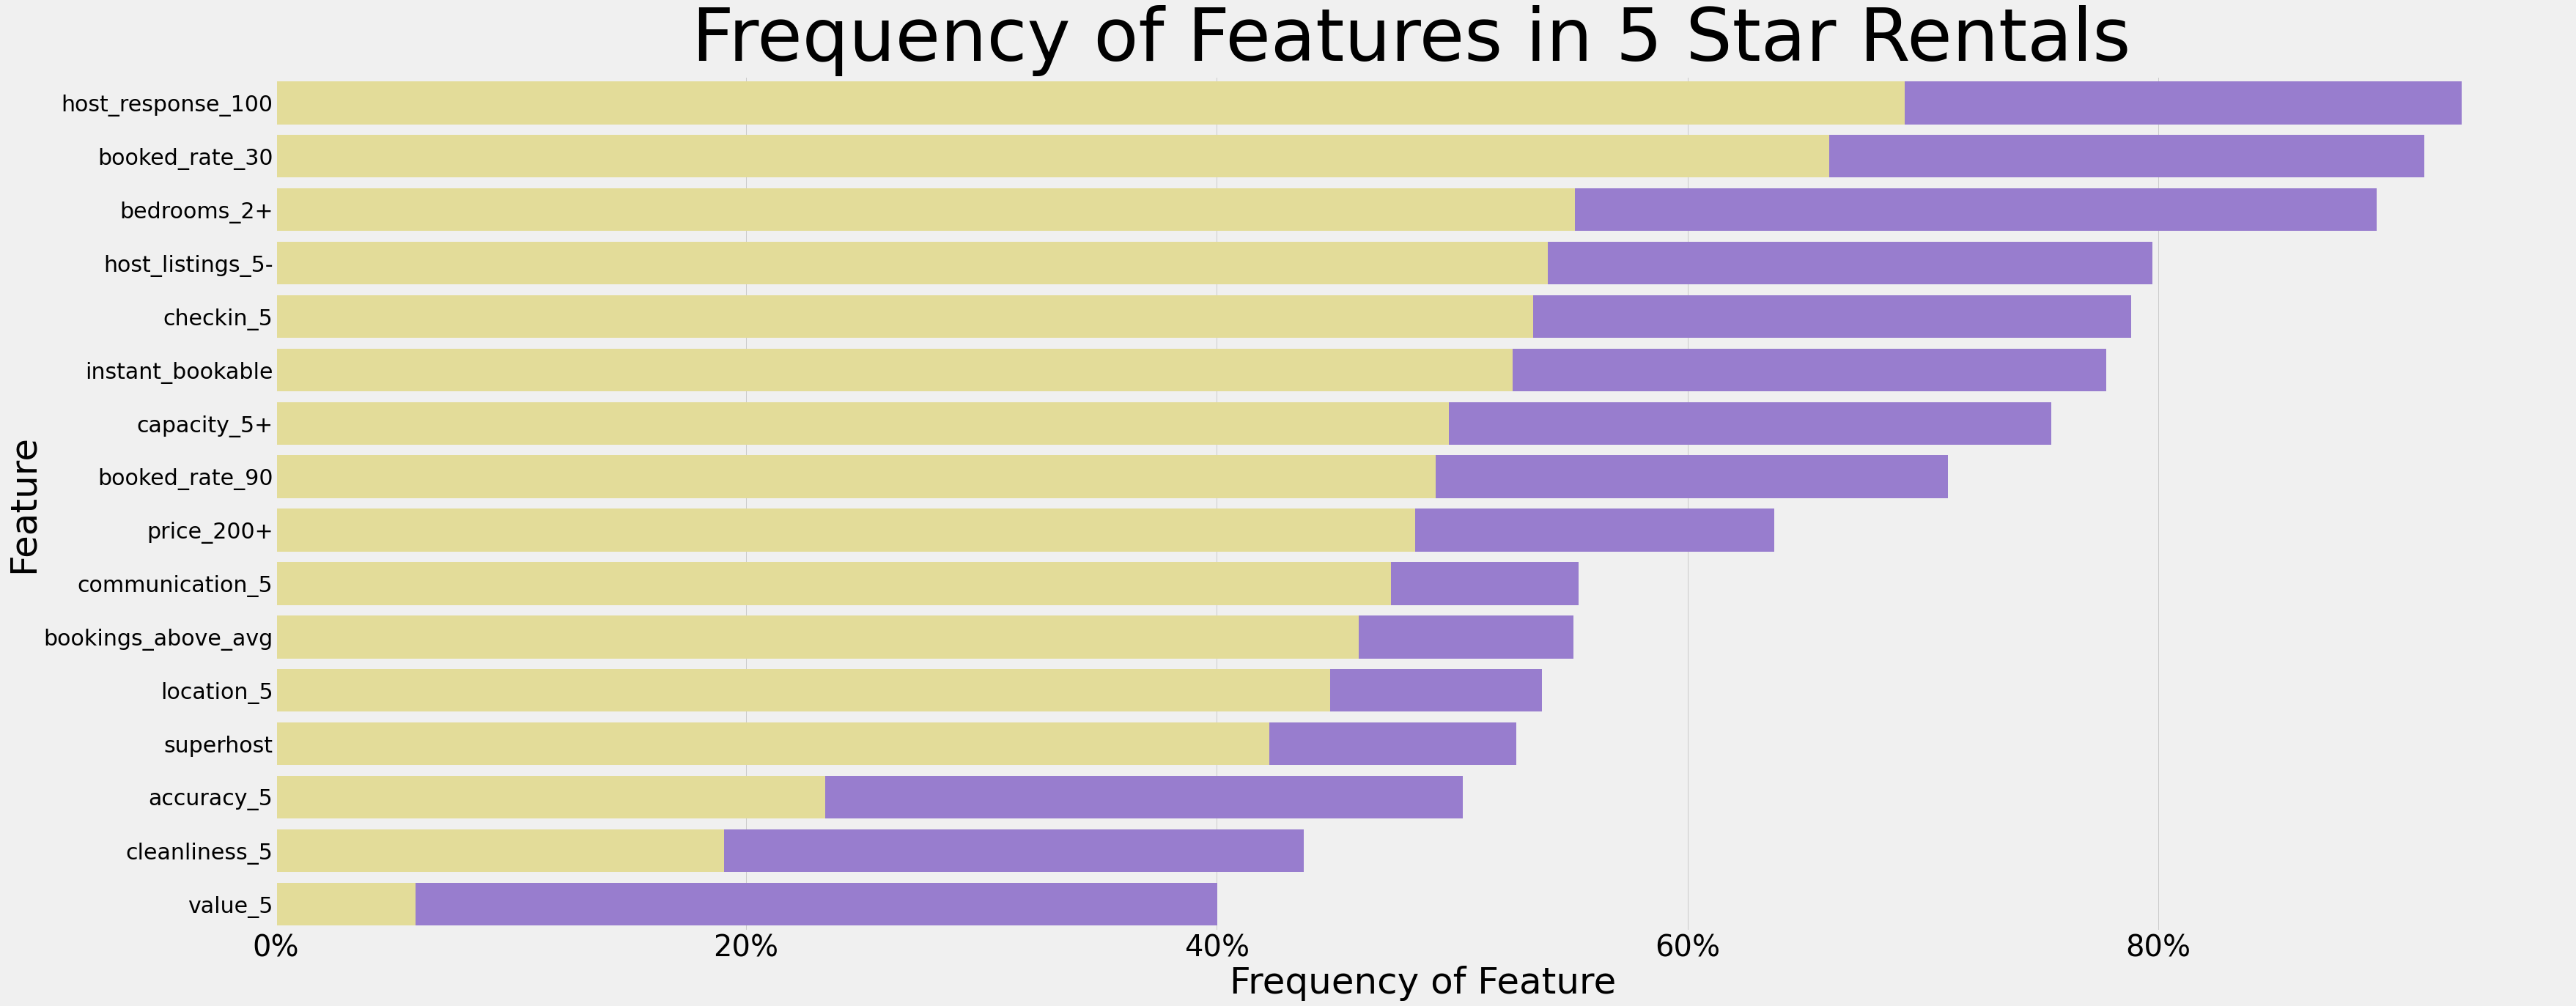

In [242]:
fig, ax = plt.subplots(figsize=(50,20))


#p = sns.lineplot(data=five_star_stats, color ='green' );
#p = sns.lineplot(data=five_star_stats_only, x='Metric', y='True', color ='green' );
p = sns.barplot(data=five_star_stats_only, x='value', y='Metric', color ='mediumpurple', label='5-Star Units');
p = sns.barplot(data=not_five_star_stats_only, x='value', y='Metric', color ='khaki', label='Not 5-Star' );

#ax.set_xlim(.10, .80)




p.set_xlabel("Frequency of Feature", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title("Frequency of Features in 5 Star Rentals ", fontsize = 100)
plt.figsize=(30,20) 

plt.show();

### <b> #4: Communication is Critical in Setting Guest Expectations!</b>
- accurate listing
- explanation of airbnb's skewed review system.
- do this without being deceptive or cooercive.

- It doesn't matter that you have all the metrics and analysis to <b>know</b> that your unit deserves 5-star reviews. Your fate is in the hands of the reviewers. If you really care about getting 5 star reviews (and you should since they are critical to success on AirBnb), you need to explain this to your guests. 

- It is also important to do this without begging, or deceptively cooercing your guests.

- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)



- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)

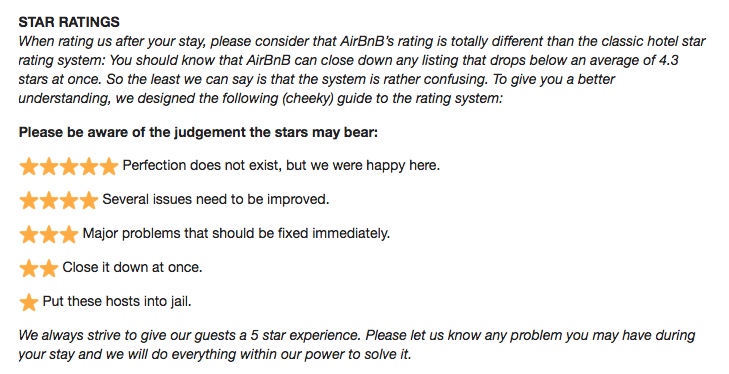

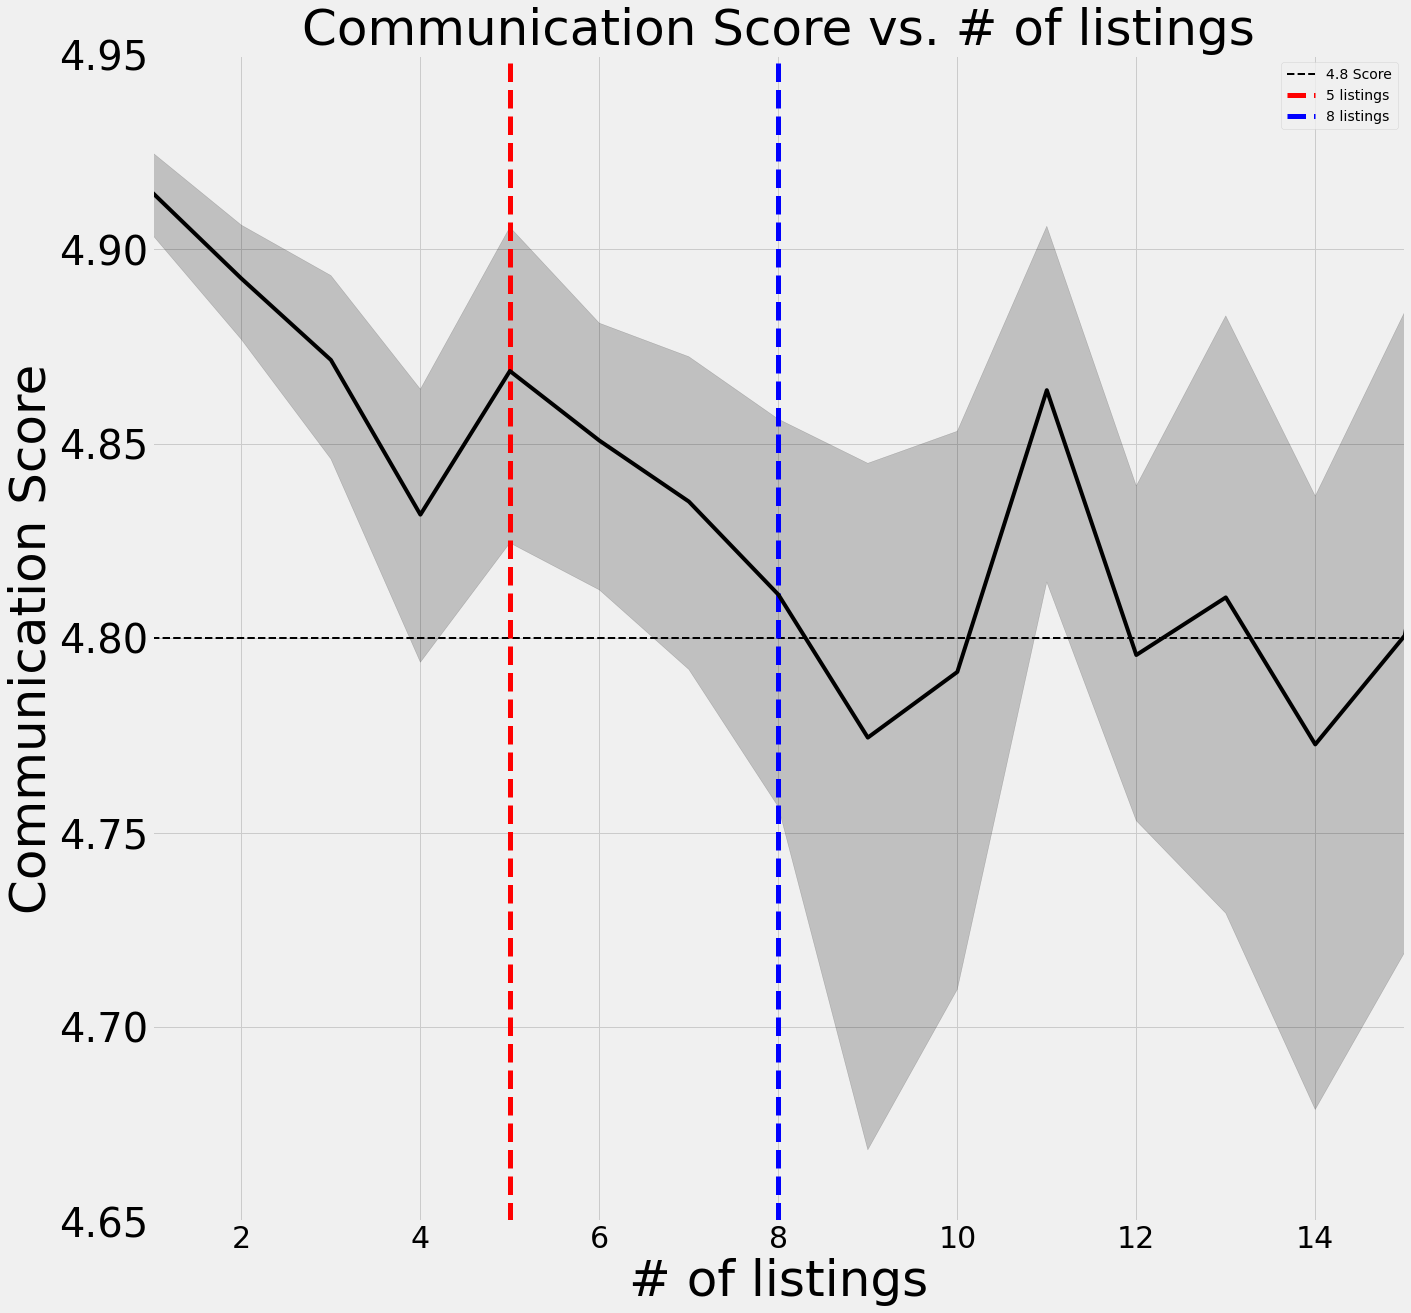

In [243]:
fig, ax = plt.subplots(figsize=(20,20))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')
ax.axvline(5, ls='--', color='red', linewidth=(5), label='5 listings')
ax.axvline(8, ls='--', color='blue', linewidth=(5), label='8 listings')

ax.set_xlim(1,15)
ax.set_ylim(4.65,4.95)

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_communication',
                color ='black' );


p.set_ylabel("Communication Score", fontsize = 50)

p.set_xlabel("# of listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Communication Score vs. # of listings", fontsize = 50)
plt.figsize=(30,20) 

plt.show();

# Continue Adding Recommendations!!!!

## Conclusion

## Further Work

- use NLP to process and analyze ammenties. Get them into a format where they can be one-hot encoded and fed into the model.
- Increase the scope of this model, incorporating data from the rest of california, and then the rest of the US.

## <b><u> Archive</b></u>